In [1]:
import sys
sys.path.append('..')
import edlib
import numpy as np
from collections import Counter, defaultdict
import operator

from lrd_parser import LRD_Report
from utils.bio import hamming_distance, identity_shift, OverlapAlignment, compress_homopolymer
import networkx as nx

import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from ndex2.nice_cx_network import NiceCXNetwork
import ndex2.client as nc
import ndex2

%load_ext autoreload
%autoreload 2

In [254]:
lrd_report_fn = '/Poppy/abzikadze/centroFlye/centroFlye_repo/data/rel3_cen6_Karen_spreadsheet/LRD/decomposition.tsv'
monomers_fn = "/Poppy/abzikadze/tandem_flye/data/human/isolated_centromeres/extracted_HORs/CEN6/monomers/inferred_monomers_single.fa"

lrd_report = LRD_Report(lrd_report_fn=lrd_report_fn, monomers_fn=monomers_fn)

In [255]:
# r_id1, r_id2 = "35aded7d-a60e-4628-ab38-4fd91010c0f6", "35aded7d-a60e-4628-ab38-4fd91010c0f6"

r_id1, r_id2 = "71fc9912-72f2-4f3e-95a0-a0311ebd0387", "35aded7d-a60e-4628-ab38-4fd91010c0f6"


#r_id1, r_id2 = "e1e9d70e-c20b-47fe-89b3-8777b85ccc43", "35aded7d-a60e-4628-ab38-4fd91010c0f6"

#r_id1, r_id2 = "71fc9912-72f2-4f3e-95a0-a0311ebd0387", "8f6d8463-6933-425a-8027-e0e8164026c0"
# r_id1, r_id2 = "0c50866b-f780-4551-a4bb-aa35a72f3f4d", "4578e1fd-b534-433e-87af-9e88fbdf48c1"

# r_id1, r_id2 = "aff6bdf9-4388-46e6-9aa5-af5c6c88258d", "c5bb3e14-3a0b-41f2-9b0f-2007cd12591f"


s1, s2 = lrd_report.records[r_id1].string, lrd_report.records[r_id2].string

In [4]:
identity_shift(s1, s2, min_overlap=100)

{'alt_shifts': [],
 'hd': 30,
 'id': 0.8421052631578947,
 'len': 190,
 'shift': 1038}

In [5]:
OverlapAlignment(s1, s2, mismatch=1, sigma=20)

(815,
 'OPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRADEFGHIJKLMNOPQRADEFGHIJKLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRADE|FGHIJKLMNOPQRADEFGHIJKLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJK=MNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRADEFGHIJKLMNOPQRADEFGHIJKLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKL---PQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLM

In [6]:
len(s1), len(s2)

(1228, 1364)

# Transformation into units

In [802]:
from string import ascii_uppercase
from itertools import groupby
def monomers2units(s, unit_len=18):
    units = []
    i = 0
    while i < len(s):
        u_st = i
        j = 0
        shift = ascii_uppercase.find(s[i])
        if shift == -1:
            i += 1
            units.append('=')
            continue
        while i + j < len(s) and ascii_uppercase[j+shift] == s[i+j]:
            j += 1
        if shift == 0 and j == unit_len:
            units.append('Full')
        else:
            units.append((shift, shift+j-1))
        i += j
    compressed_units = []
    for key, group in groupby(units):
        compressed_units.append((key, len(list(group))))
    return compressed_units

In [803]:
# r_id1, r_id2 = "35aded7d-a60e-4628-ab38-4fd91010c0f6", "35aded7d-a60e-4628-ab38-4fd91010c0f6"

r_id1, r_id2 = "71fc9912-72f2-4f3e-95a0-a0311ebd0387", "35aded7d-a60e-4628-ab38-4fd91010c0f6"
#r_id1, r_id2 = "71fc9912-72f2-4f3e-95a0-a0311ebd0387", "8f6d8463-6933-425a-8027-e0e8164026c0"
#r_id1, r_id2 = "0c50866b-f780-4551-a4bb-aa35a72f3f4d", "4578e1fd-b534-433e-87af-9e88fbdf48c1"

s1, s2 = lrd_report.records[r_id1].string, lrd_report.records[r_id2].string

monomers2units(s1)

[((14, 17), 1),
 ('Full', 2),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 5),
 ((0, 16), 1),
 ((11, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 5),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 10), 1),
 ('=', 1),
 ((12, 17), 1),
 ('Full', 7),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 8),
 ((0, 11), 1),
 ((15, 17), 1),
 ('Full', 13),
 ((0, 16), 1),
 ('=', 2),
 ((1, 17), 1),
 ('Full', 12),
 ((0, 0), 1)]

# Assembly from DeBruijn graph

In [9]:
monomer_lens = np.array([len(record.string) for record in lrd_report.records.values()])

In [10]:
np.mean(monomer_lens)

1447.8260869565217

In [11]:
np.median(monomer_lens)

1345.0

In [12]:
k = 300

In [13]:
sum(monomer_lens >= k)

92

In [14]:
kmers = []
for record in lrd_report.records.values():
    kmers += [record.string[i:i+k] for i in range(len(record.string)-k+1)]


In [ ]:
kmer_counter = Counter(kmers)

In [ ]:
kmer_counter

In [ ]:
kmers_counter = [(kmer, cnt) for (kmer, cnt) in kmer_counter.most_common() if 3 <= cnt <= 200]
kmers = [kmer for (kmer, cnt) in kmers_counter]

In [ ]:
coverage = {kmer: cnt for (kmer, cnt) in kmers_counter}

In [ ]:
class DeBruijnGraph:
    def __init__(self, k):
        self.graph = nx.MultiDiGraph()
        self.k = k

    def add_kmer(self, kmer, color='black', coverage=1):
        self.graph.add_edge(kmer[:-1], kmer[1:],
                            edge_kmer=kmer,
                            color=color,
                            coverages=[coverage])

    def add_kmers(self, kmers, color='black', coverage=None):
        for kmer in kmers:
            if coverage is None:
                self.add_kmer(kmer, color=color)
            else:
                self.add_kmer(kmer, color=color, coverage=coverage[kmer])


In [ ]:
db = DeBruijnGraph(k=k)
db.add_kmers(kmers, coverage=coverage)

In [ ]:
# db.graph.nodes

In [ ]:
nx.number_strongly_connected_components(db.graph)

# How many reads have a gap

In [193]:
np.mean(['=' in record.string for record in lrd_report.records.values()])

0.81521739130434778

In [203]:
np.mean(['==' in record.string.strip('=') for record in lrd_report.records.values()])

0.53260869565217395

In [201]:
for r_id, record in lrd_report.records.items():
    rec_string = record.string.strip('=')
    if '==' in rec_string:
        print(r_id, rec_string)

0c0dd3f7-6828-447b-ac53-1d118b0270a0 FGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHI=KLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHI===MNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKL
0c50866b-f780-4551-a4bb-aa35a72f3f4d OPQRADE===IJKLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHI

In [252]:
split_lens = []
for r_id, record in lrd_report.records.items():
    rec_strings = record.string.strip('=').split('==')
    rec_strings = [rec_string for rec_string in rec_strings if len(rec_string) > 100]
    
    # split_lens.append(len(rec_strings))
    print(len(record.string.strip('=')), [len(rec_string) for rec_string in rec_strings])
    if len(rec_strings) > 10:
        print(r_id, record.string)
    split_lens += [len(rec_string) for rec_string in rec_strings]
    #if '==' in rec_string:
    #    print(r_id, rec_string)
np.mean(split_lens), np.median(split_lens), np.sum(split_lens)

1214 [1214]
701 [701]
1071 [1071]
826 [757]
1346 [176, 1159]
1386 [1386]
1401 [1103, 296]
1251 [1251]
2457 [2457]
1228 [1228]
3139 [513, 544, 897, 766]
792 [792]
868 [831]
1410 [1410]
1449 [620, 827]
1609 [752, 740]
1363 [1363]
1445 [1445]
2328 [1180, 105, 644]
1204 [1204]
1544 [1544]
1199 [945, 252]
2207 [411, 938, 843]
1537 [493, 1013]
1295 [1295]
1617 [101, 174, 219, 124]
676 [676]
1768 [1419, 341]
1199 [1199]
922 [900]
2853 []
886 [886]
1356 [1356]
1275 [103, 122, 110, 144, 151]
876 [876]
1026 [1026]
1119 [1119]
1319 [1073, 222]
621 [621]
1228 [992, 234]
815 [571, 242]
1924 [1319]
1237 [592, 643]
1164 [1164]
1502 [476, 1024]
1307 [883, 422]
1322 [1322]
1247 [480, 653]
807 [131, 642]
967 [967]
668 [668]
1260 [1260]
1347 [108, 491, 113, 317, 142]
2662 [2647]
1286 [188, 445, 312, 173]
2338 [2338]
1634 [1535]
1221 [816]
1455 [1455]
1962 [1962]
1510 [123, 233, 145, 203, 152]
2232 [2232]
1194 [396]
1364 [1364]
1226 [127, 663, 426]
1940 [605, 1251]
984 [984]
1524 [300]
1861 [1633]
1448 [1

(740.15950920245393, 650.0, 120646)

In [251]:
np.median([len(record.string.strip('=')) for record in lrd_report.records.values()])

1344.0

# Hamming graph to error-correct reads

In [17]:
k = 100

all_kmers = []
for record in lrd_report.records.values():
    kmers = [record.string[i:i+k] for i in range(len(record.string)-k+1)]
    


In [18]:
Counter(kmers)

Counter({'ABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRA': 2,
         'BCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRAB': 2,
         'CDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABF': 1,
         'DEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFG': 1,
         'EFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGH': 1,
         'FGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHI': 2,
         'GHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJ': 2,
         'HIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJK': 2,
         'IJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRA

# Investigating gaps

In [190]:
r_id = "0c50866b-f780-4551-a4bb-aa35a72f3f4d"

In [191]:
lrd_report.records[r_id].string

'==OPQRADE===IJKLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDE==HIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQ=ABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQR

In [192]:
lrd_report.records[r_id].gaps

[(31607, 31951), (103122, 103283)]

# HD b/w long reads

In [22]:
long_reads = {r_id: record.string for r_id, record in lrd_report.records.items() if len(record.string) > 600}

In [23]:
len(long_reads)

def get_hds(long_reads):
    hds = {}
    for r_id1, s1 in long_reads.items():
        for r_id2, s2 in long_reads.items():
            if s1 >= s2: continue
            res = identity_shift(s1, s2, min_overlap=100)
            if res['id'] > 0.99 and len(res['alt_shifts']) == 0:
                hds[(r_id1, r_id2)] = res
                print(r_id1[:8], r_id2[:8], res)
    return hds           

In [24]:
hds = get_hds(long_reads)

054f1983 f9347a59 {'id': 1.0, 'shift': 521, 'hd': 0, 'len': 180, 'alt_shifts': []}
08a68948 27685c3b {'id': 1.0, 'shift': 842, 'hd': 0, 'len': 229, 'alt_shifts': []}
08a68948 989d6a9b {'id': 1.0, 'shift': 895, 'hd': 0, 'len': 176, 'alt_shifts': []}
08a68948 d84233c4 {'id': 1.0, 'shift': 879, 'hd': 0, 'len': 192, 'alt_shifts': []}
0c0dd3f7 1b0ec5c2 {'id': 0.9918032786885246, 'shift': 460, 'hd': 3, 'len': 366, 'alt_shifts': []}
0c0dd3f7 27685c3b {'id': 0.994277539341917, 'shift': 127, 'hd': 4, 'len': 699, 'alt_shifts': []}
0c0dd3f7 696cdd6a {'id': 0.9937655860349127, 'shift': 24, 'hd': 5, 'len': 802, 'alt_shifts': []}
0c0dd3f7 ca8a1da5 {'id': 0.990234375, 'shift': 314, 'hd': 5, 'len': 512, 'alt_shifts': []}
0c0dd3f7 d84233c4 {'id': 0.9939577039274925, 'shift': 164, 'hd': 4, 'len': 662, 'alt_shifts': []}
0c0dd3f7 f9347a59 {'id': 0.9907692307692307, 'shift': 501, 'hd': 3, 'len': 325, 'alt_shifts': []}
0c50866b 0c0dd3f7 {'id': 1.0, 'shift': 1244, 'hd': 0, 'len': 104, 'alt_shifts': []}
0c508

KeyboardInterrupt: 

In [25]:
len(hds)

NameError: name 'hds' is not defined

In [77]:
class MonomerContig:
    def __init__(self):
        self.max_pos = 0
        self.monomers = defaultdict(Counter)
        self.read_positions = {}
        self.coverage = defaultdict(int)
        self.string = ''

    def update_max_pos(self):
        if len(self.monomers):
            self.max_pos = max(self.monomers.keys())
        else:
            self.max_pos = 0
    
    def update_string(self):
        new_string = [0] * (self.max_pos + 1)
        for i, monomer_distr in self.monomers.items():
            new_string[i] = max(monomer_distr.items(),
                                key=operator.itemgetter(1))[0]
        self.string = ''.join(new_string)

    def add_read(self, r_id, monomer_string, position):
        self.read_positions[r_id] = position
        new_freq_kmers = []
        for i, monomer in enumerate(monomer_string):
            # print(self.monomers[i+position][monomer])
            self.coverage[i + position] += 1
            self.monomers[i + position][monomer] += 1
            # print(self.monomers[i+position][monomer])
            
        self.update_max_pos()
        self.update_string()
        # assert len(set(new_freq_kmers)) == len(new_freq_kmers)

    def calc_inters_score(self, monomer_string,
                          min_overlap=100,
                          verbose=False):
        hd = identity_shift(self.string,
                            monomer_string,
                            min_overlap=min_overlap)
        return hd

def update_mapping_scores(contig, kmers2pos, freq_kmers, scores=None):
    if scores is None:
        scores = defaultdict(lambda: defaultdict(Counter))
    for kmer, cc_kmer_pos in freq_kmers:
        if kmer in kmers2pos:
            for r_id, pos in kmers2pos[kmer]:
                if cc_kmer_pos >= pos:
                    scores[r_id][cc_kmer_pos-pos][pos] += 1
    return scores

In [78]:
long_records = {r_id: record for r_id, record in lrd_report.records.items()}

prefix_reads = \
{r_id: long_records[r_id].string for r_id in ["ab79a298-1f1a-44da-a174-6a52ae8abfcd",
                                              "e1e9d70e-c20b-47fe-89b3-8777b85ccc43"]}
non_prefix_reads = \
{r_id: record.string for r_id, record in long_records.items() if r_id not in prefix_reads}

assert len(long_records) == len(prefix_reads) + len(non_prefix_reads)

In [79]:
len(prefix_reads), len(non_prefix_reads)

(2, 90)

In [80]:
prefix_reads

{'ab79a298-1f1a-44da-a174-6a52ae8abfcd': '======================================================================================================================================================================================================================================================AQ=K=JKLMNOPQ==RABHIEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGH=JKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKL

In [89]:
def get_read_longest_prefix(prefix_reads):
    best_r_id = None
    longest_prefix = 0
    for r_id, read in prefix_reads.items():
        prefix = 0
        while prefix < len(read) and read[prefix] == '=':
            prefix += 1
        if prefix > longest_prefix:
            best_r_id = r_id
            longest_prefix = prefix
    return best_r_id, longest_prefix


def add_left_reads(contig, prefix_reads, min_overlap=100, min_id=0.95):
    rid_longest_pref, _ = get_read_longest_prefix(prefix_reads)
    contig.add_read(rid_longest_pref, prefix_reads[rid_longest_pref], position=0)
    for r_id, read in prefix_reads.items():
        if r_id == rid_longest_pref:
            continue
        hd = identity_shift(prefix_reads[rid_longest_pref],
                            read,
                            min_overlap=min_overlap)
        if hd["id"] > min_id:
            contig.add_read(r_id, read, position=hd["shift"])
    return contig

In [90]:
contig = MonomerContig()

contig = add_left_reads(contig, prefix_reads)

In [91]:
print(len(contig.monomers))
for i, monomer in contig.monomers.items():
    print(i, monomer)

2910
0 Counter({'=': 1})
1 Counter({'=': 1})
2 Counter({'=': 2})
3 Counter({'=': 2})
4 Counter({'=': 2})
5 Counter({'=': 2})
6 Counter({'=': 2})
7 Counter({'=': 2})
8 Counter({'=': 2})
9 Counter({'=': 2})
10 Counter({'=': 2})
11 Counter({'=': 2})
12 Counter({'=': 2})
13 Counter({'=': 2})
14 Counter({'=': 2})
15 Counter({'=': 2})
16 Counter({'=': 2})
17 Counter({'=': 2})
18 Counter({'=': 2})
19 Counter({'=': 2})
20 Counter({'=': 2})
21 Counter({'=': 2})
22 Counter({'=': 2})
23 Counter({'=': 2})
24 Counter({'=': 2})
25 Counter({'=': 2})
26 Counter({'=': 2})
27 Counter({'=': 2})
28 Counter({'=': 2})
29 Counter({'=': 2})
30 Counter({'=': 2})
31 Counter({'=': 2})
32 Counter({'=': 2})
33 Counter({'=': 2})
34 Counter({'=': 2})
35 Counter({'=': 2})
36 Counter({'=': 2})
37 Counter({'=': 2})
38 Counter({'=': 2})
39 Counter({'=': 2})
40 Counter({'=': 2})
41 Counter({'=': 2})
42 Counter({'=': 2})
43 Counter({'=': 2})
44 Counter({'=': 2})
45 Counter({'=': 2})
46 Counter({'=': 2})
47 Counter({'=': 2

1644 Counter({'C': 2})
1645 Counter({'D': 2})
1646 Counter({'E': 2})
1647 Counter({'F': 2})
1648 Counter({'G': 2})
1649 Counter({'H': 2})
1650 Counter({'I': 2})
1651 Counter({'J': 2})
1652 Counter({'K': 2})
1653 Counter({'L': 2})
1654 Counter({'M': 2})
1655 Counter({'N': 2})
1656 Counter({'O': 2})
1657 Counter({'P': 2})
1658 Counter({'Q': 2})
1659 Counter({'R': 2})
1660 Counter({'A': 2})
1661 Counter({'B': 2})
1662 Counter({'C': 2})
1663 Counter({'D': 2})
1664 Counter({'E': 2})
1665 Counter({'F': 2})
1666 Counter({'G': 2})
1667 Counter({'H': 2})
1668 Counter({'I': 2})
1669 Counter({'J': 2})
1670 Counter({'K': 2})
1671 Counter({'L': 2})
1672 Counter({'M': 2})
1673 Counter({'N': 2})
1674 Counter({'O': 2})
1675 Counter({'P': 2})
1676 Counter({'Q': 2})
1677 Counter({'R': 2})
1678 Counter({'A': 2})
1679 Counter({'B': 2})
1680 Counter({'C': 2})
1681 Counter({'D': 2})
1682 Counter({'E': 2})
1683 Counter({'F': 2})
1684 Counter({'G': 2})
1685 Counter({'H': 2})
1686 Counter({'I': 2})
1687 Counte

In [92]:
contig.string

'========================================================================================================================================================================================================================================================AO==LJKLMNOPQRARABHIEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKL=N==QRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEF=HIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNO

In [98]:
def add_nonprefix_reads(contig, reads, min_ident=0.3, min_overlap=300):
    unused_reads = set(reads.keys())
    while len(unused_reads):
        best_read, best_score, best_pos, best_hd = None, (0, 0), None, None
        for r_id in unused_reads:
            read = reads[r_id]
            hd = contig.calc_inters_score(read, min_overlap=min_overlap)
            if len(hd['alt_shifts']) != 0 or hd['id'] < min_ident:
                continue
            score = (hd['id'], hd['len'])
            
            if score > best_score:
                #print(score, pos)
                best_read = r_id
                best_score = score
                best_pos = hd['shift']
                best_hd = hd
        print(best_read, best_pos, best_hd)
        contig.add_read(best_read,
                        reads[best_read],
                        position=best_pos)
        unused_reads.remove(best_read)
    return contig

In [99]:
add_nonprefix_reads(contig, non_prefix_reads)

11416399-75e7-4251-824f-c17721a01605 2009 {'id': 1.0, 'shift': 2009, 'hd': 0, 'len': 1386, 'alt_shifts': []}
44881201-9746-4ce0-9a88-b6d3b97045af 1827 {'id': 0.9975, 'shift': 1827, 'hd': 3, 'len': 1200, 'alt_shifts': []}
01f80610-395e-4ef8-93d0-526989b8cb53 4099 {'id': 0.9969673995451099, 'shift': 4099, 'hd': 4, 'len': 1319, 'alt_shifts': []}
989d6a9b-96ec-413c-bc8b-03b96737e87d 2978 {'id': 0.9895749799518845, 'shift': 2978, 'hd': 13, 'len': 1247, 'alt_shifts': []}
ee68ff9e-5a90-48bd-b8bf-b4a3e2e546a1 2483 {'id': 0.9796186719263642, 'shift': 2483, 'hd': 31, 'len': 1521, 'alt_shifts': []}
aff6bdf9-4388-46e6-9aa5-af5c6c88258d 3182 {'id': 0.98531211750306, 'shift': 3182, 'hd': 24, 'len': 1634, 'alt_shifts': []}
aca29862-0b10-4c27-875f-048ff5a6cb82 2220 {'id': 0.9618973561430794, 'shift': 2220, 'hd': 49, 'len': 1286, 'alt_shifts': []}
ca0eeaaf-2aee-4e3e-9134-acca35d636ad 481 {'id': 0.8785656071719641, 'shift': 481, 'hd': 149, 'len': 1227, 'alt_shifts': []}
6e54ff5e-7a55-4dad-bae3-004d255dd

b6b65f51-d813-4a3a-a3e1-45c5ecb241df 15709 {'id': 0.8378378378378378, 'shift': 15709, 'hd': 198, 'len': 1221, 'alt_shifts': []}
2fef785e-910e-4071-87f5-ba59052d4f7f 1453 {'id': 0.8314447592067988, 'shift': 1453, 'hd': 238, 'len': 1412, 'alt_shifts': []}
1b4bd09e-07f3-4455-b041-c4599b6fbe3d 1114 {'id': 0.823840520748576, 'shift': 1114, 'hd': 433, 'len': 2458, 'alt_shifts': []}
4a47c299-3a7d-4d5e-8670-12bd357bb21e 11223 {'id': 0.8, 'shift': 11223, 'hd': 324, 'len': 1620, 'alt_shifts': []}
3d0bd9d9-7656-43d6-9929-32a0151bd996 14572 {'id': 0.795155121121972, 'shift': 14572, 'hd': 482, 'len': 2353, 'alt_shifts': []}
13b093b1-6dd5-4fbe-9a41-0c927ef131ff 9169 {'id': 0.7865810135617416, 'shift': 9169, 'hd': 299, 'len': 1401, 'alt_shifts': []}
4578e1fd-b534-433e-87af-9e88fbdf48c1 1915 {'id': 0.7349342999546896, 'shift': 1915, 'hd': 585, 'len': 2207, 'alt_shifts': []}
0c50866b-f780-4551-a4bb-aa35a72f3f4d 1692 {'id': 0.7232937685459941, 'shift': 1692, 'hd': 373, 'len': 1348, 'alt_shifts': []}
d2f

KeyError: None

In [ ]:
#contig.add_read('e1e9d70e-c20b-47fe-89b3-8777b85ccc43', non_prefix_reads['e1e9d70e-c20b-47fe-89b3-8777b85ccc43'],
#                position=2)


In [100]:
len(contig.monomers)

17781

In [101]:
for i, monomer in contig.monomers.items():
    print(i, monomer)

0 Counter({'=': 1})
1 Counter({'=': 1})
2 Counter({'=': 2})
3 Counter({'=': 2})
4 Counter({'=': 2})
5 Counter({'=': 2})
6 Counter({'=': 2})
7 Counter({'=': 2})
8 Counter({'=': 2})
9 Counter({'=': 2})
10 Counter({'=': 2})
11 Counter({'=': 2})
12 Counter({'=': 2})
13 Counter({'=': 2})
14 Counter({'=': 2})
15 Counter({'=': 2})
16 Counter({'=': 2})
17 Counter({'=': 2})
18 Counter({'=': 2})
19 Counter({'=': 2})
20 Counter({'=': 2})
21 Counter({'=': 2})
22 Counter({'=': 2})
23 Counter({'=': 2})
24 Counter({'=': 2})
25 Counter({'=': 2})
26 Counter({'=': 2})
27 Counter({'=': 2})
28 Counter({'=': 2})
29 Counter({'=': 2})
30 Counter({'=': 2})
31 Counter({'=': 2})
32 Counter({'=': 2})
33 Counter({'=': 2})
34 Counter({'=': 2})
35 Counter({'=': 2})
36 Counter({'=': 2})
37 Counter({'=': 2})
38 Counter({'=': 2})
39 Counter({'=': 2})
40 Counter({'=': 2})
41 Counter({'=': 2})
42 Counter({'=': 2})
43 Counter({'=': 2})
44 Counter({'=': 2})
45 Counter({'=': 2})
46 Counter({'=': 2})
47 Counter({'=': 2})
48

1520 Counter({'A': 9, 'R': 1})
1521 Counter({'D': 9, 'A': 1})
1522 Counter({'E': 9, 'D': 1})
1523 Counter({'F': 9, 'E': 1})
1524 Counter({'G': 9, 'F': 1})
1525 Counter({'H': 9, 'G': 1})
1526 Counter({'I': 9, 'H': 1})
1527 Counter({'J': 9, 'I': 1})
1528 Counter({'K': 8, 'J': 1, '=': 1})
1529 Counter({'L': 9, 'K': 1})
1530 Counter({'M': 9, 'L': 1})
1531 Counter({'N': 9, 'M': 1})
1532 Counter({'O': 9, 'N': 1})
1533 Counter({'P': 9, 'O': 1})
1534 Counter({'Q': 9, 'P': 1})
1535 Counter({'R': 9, 'Q': 1})
1536 Counter({'A': 9, 'R': 1})
1537 Counter({'D': 5, 'B': 4, 'A': 1})
1538 Counter({'E': 5, 'C': 4, 'B': 1})
1539 Counter({'F': 5, 'D': 4, 'C': 1})
1540 Counter({'G': 5, 'E': 4, 'D': 1})
1541 Counter({'H': 5, 'F': 4, 'E': 1})
1542 Counter({'I': 5, 'G': 4, 'F': 1})
1543 Counter({'J': 5, 'H': 4, 'G': 1})
1544 Counter({'K': 5, 'I': 4, 'H': 1})
1545 Counter({'L': 5, 'J': 4, 'I': 1})
1546 Counter({'M': 5, 'K': 3, 'J': 1, '=': 1})
1547 Counter({'N': 5, 'L': 3, 'K': 1, '=': 1})
1548 Counter({'O': 5

3270 Counter({'J': 14, '=': 2})
3271 Counter({'K': 15, '=': 1})
3272 Counter({'L': 15, '=': 1})
3273 Counter({'M': 15, '=': 1})
3274 Counter({'N': 15, '=': 1})
3275 Counter({'O': 14, '=': 2})
3276 Counter({'P': 15, '=': 1})
3277 Counter({'Q': 15, '=': 1})
3278 Counter({'R': 14, '=': 2})
3279 Counter({'A': 15, '=': 1})
3280 Counter({'B': 15, '=': 1})
3281 Counter({'C': 15, '=': 1})
3282 Counter({'D': 15, '=': 1})
3283 Counter({'E': 15, '=': 1})
3284 Counter({'F': 16})
3285 Counter({'G': 16})
3286 Counter({'H': 16})
3287 Counter({'I': 16})
3288 Counter({'J': 16})
3289 Counter({'K': 16})
3290 Counter({'L': 16})
3291 Counter({'M': 15, '=': 1})
3292 Counter({'N': 15, '=': 1})
3293 Counter({'O': 16})
3294 Counter({'P': 16})
3295 Counter({'Q': 16})
3296 Counter({'R': 15, '=': 1})
3297 Counter({'A': 15, '=': 1})
3298 Counter({'B': 15, '=': 1})
3299 Counter({'C': 15, '=': 1})
3300 Counter({'D': 15, '=': 1})
3301 Counter({'E': 15, '=': 1})
3302 Counter({'F': 15, '=': 1})
3303 Counter({'G': 15, '

4269 Counter({'R': 5, 'K': 1, '=': 1})
4270 Counter({'A': 5, 'L': 1, '=': 1})
4271 Counter({'B': 5, 'M': 1, '=': 1})
4272 Counter({'C': 5, 'N': 1, '=': 1})
4273 Counter({'D': 5, 'O': 1, '=': 1})
4274 Counter({'E': 5, 'P': 1, '=': 1})
4275 Counter({'F': 5, 'Q': 1, '=': 1})
4276 Counter({'G': 5, 'R': 1, '=': 1})
4277 Counter({'H': 5, 'A': 1, '=': 1})
4278 Counter({'I': 5, 'B': 1, '=': 1})
4279 Counter({'J': 5, 'C': 1, '=': 1})
4280 Counter({'K': 5, 'D': 1, '=': 1})
4281 Counter({'L': 5, 'E': 1, '=': 1})
4282 Counter({'M': 5, 'F': 1, '=': 1})
4283 Counter({'N': 5, 'G': 1, '=': 1})
4284 Counter({'O': 5, 'H': 1, '=': 1})
4285 Counter({'P': 5, 'I': 1, '=': 1})
4286 Counter({'Q': 5, 'J': 1, '=': 1})
4287 Counter({'R': 6, 'K': 1})
4288 Counter({'A': 6, 'L': 1})
4289 Counter({'B': 5, 'M': 1, '=': 1})
4290 Counter({'C': 5, 'N': 1, '=': 1})
4291 Counter({'D': 5, 'O': 1, '=': 1})
4292 Counter({'E': 5, 'P': 1, '=': 1})
4293 Counter({'F': 5, 'Q': 1, '=': 1})
4294 Counter({'G': 5, 'R': 1, '=': 1})
42

6019 Counter({'I': 7, '=': 1, 'L': 1})
6020 Counter({'J': 8, 'M': 1})
6021 Counter({'K': 8, 'N': 1})
6022 Counter({'L': 8, 'O': 1})
6023 Counter({'M': 8, 'P': 1})
6024 Counter({'N': 8, 'Q': 1})
6025 Counter({'O': 8, 'R': 1})
6026 Counter({'P': 8, 'A': 1})
6027 Counter({'Q': 8, 'B': 1})
6028 Counter({'R': 8, 'F': 1})
6029 Counter({'A': 8, 'G': 1})
6030 Counter({'B': 8, 'H': 1})
6031 Counter({'F': 8, 'I': 1})
6032 Counter({'G': 8, 'J': 1})
6033 Counter({'H': 8, 'K': 1})
6034 Counter({'I': 7, '=': 1, 'L': 1})
6035 Counter({'J': 8, 'M': 1})
6036 Counter({'K': 8, 'N': 1})
6037 Counter({'L': 8, 'O': 1})
6038 Counter({'M': 8, 'P': 1})
6039 Counter({'N': 8, 'Q': 1})
6040 Counter({'O': 8, 'R': 1})
6041 Counter({'P': 7, '=': 1, 'A': 1})
6042 Counter({'Q': 8, 'B': 1})
6043 Counter({'R': 8, 'C': 1})
6044 Counter({'A': 8, 'D': 1})
6045 Counter({'B': 8, 'E': 1})
6046 Counter({'C': 5, 'F': 4})
6047 Counter({'G': 9})
6048 Counter({'H': 9})
6049 Counter({'I': 9})
6050 Counter({'J': 9})
6051 Counter({'K

8019 Counter({'B': 7})
8020 Counter({'C': 7})
8021 Counter({'D': 7})
8022 Counter({'E': 7})
8023 Counter({'F': 7})
8024 Counter({'G': 7})
8025 Counter({'H': 7})
8026 Counter({'I': 7})
8027 Counter({'J': 7})
8028 Counter({'K': 7})
8029 Counter({'L': 7})
8030 Counter({'M': 7})
8031 Counter({'N': 7})
8032 Counter({'O': 7})
8033 Counter({'P': 7})
8034 Counter({'Q': 7})
8035 Counter({'R': 7})
8036 Counter({'A': 7})
8037 Counter({'B': 7})
8038 Counter({'F': 7})
8039 Counter({'G': 7})
8040 Counter({'H': 7})
8041 Counter({'I': 7})
8042 Counter({'J': 7})
8043 Counter({'K': 7})
8044 Counter({'L': 7})
8045 Counter({'M': 7})
8046 Counter({'N': 7})
8047 Counter({'O': 7})
8048 Counter({'P': 7})
8049 Counter({'Q': 7})
8050 Counter({'R': 7})
8051 Counter({'A': 7})
8052 Counter({'B': 7})
8053 Counter({'F': 7})
8054 Counter({'G': 7})
8055 Counter({'H': 7})
8056 Counter({'I': 7})
8057 Counter({'J': 7})
8058 Counter({'K': 7})
8059 Counter({'L': 7})
8060 Counter({'M': 7})
8061 Counter({'N': 7})
8062 Counte

9769 Counter({'C': 4})
9770 Counter({'D': 4})
9771 Counter({'E': 4})
9772 Counter({'F': 4})
9773 Counter({'G': 4})
9774 Counter({'H': 4})
9775 Counter({'I': 4})
9776 Counter({'J': 4})
9777 Counter({'K': 4})
9778 Counter({'L': 4})
9779 Counter({'M': 4})
9780 Counter({'N': 4})
9781 Counter({'O': 4})
9782 Counter({'P': 4})
9783 Counter({'Q': 4})
9784 Counter({'R': 4})
9785 Counter({'A': 4})
9786 Counter({'B': 5})
9787 Counter({'F': 5})
9788 Counter({'G': 5})
9789 Counter({'H': 5})
9790 Counter({'I': 5})
9791 Counter({'J': 5})
9792 Counter({'K': 5})
9793 Counter({'L': 5})
9794 Counter({'M': 5})
9795 Counter({'N': 5})
9796 Counter({'O': 5})
9797 Counter({'P': 5})
9798 Counter({'Q': 5})
9799 Counter({'R': 5})
9800 Counter({'A': 5})
9801 Counter({'B': 5})
9802 Counter({'F': 5})
9803 Counter({'G': 5})
9804 Counter({'H': 5})
9805 Counter({'I': 5})
9806 Counter({'J': 5})
9807 Counter({'K': 5})
9808 Counter({'L': 5})
9809 Counter({'M': 5})
9810 Counter({'N': 5})
9811 Counter({'O': 5})
9812 Counte

11768 Counter({'J': 11, '=': 1})
11769 Counter({'K': 11, '=': 1})
11770 Counter({'L': 11, '=': 1})
11771 Counter({'M': 11, '=': 1})
11772 Counter({'N': 11, '=': 1})
11773 Counter({'O': 11, '=': 1})
11774 Counter({'P': 11, '=': 1})
11775 Counter({'Q': 11, '=': 1})
11776 Counter({'R': 11, '=': 1})
11777 Counter({'A': 11, '=': 1})
11778 Counter({'B': 11, '=': 1})
11779 Counter({'F': 10, '=': 1})
11780 Counter({'G': 10, '=': 1})
11781 Counter({'H': 10, '=': 1})
11782 Counter({'I': 10, '=': 1})
11783 Counter({'J': 10, '=': 1})
11784 Counter({'K': 10, '=': 1})
11785 Counter({'L': 10, '=': 1})
11786 Counter({'M': 10, '=': 1})
11787 Counter({'N': 10, '=': 1})
11788 Counter({'O': 10, '=': 1})
11789 Counter({'P': 10, '=': 1})
11790 Counter({'Q': 10, '=': 1})
11791 Counter({'R': 10, '=': 1})
11792 Counter({'A': 10, '=': 1})
11793 Counter({'B': 10, '=': 1})
11794 Counter({'C': 10, '=': 1})
11795 Counter({'D': 10, '=': 1})
11796 Counter({'E': 9, '=': 2})
11797 Counter({'F': 9, '=': 2})
11798 Counte

13518 Counter({'H': 6})
13519 Counter({'I': 6})
13520 Counter({'J': 6})
13521 Counter({'K': 6})
13522 Counter({'L': 5, '=': 1})
13523 Counter({'M': 5, '=': 1})
13524 Counter({'N': 4, '=': 1})
13525 Counter({'O': 4, '=': 1})
13526 Counter({'P': 4, '=': 1})
13527 Counter({'Q': 4, '=': 1})
13528 Counter({'R': 5})
13529 Counter({'A': 5})
13530 Counter({'B': 5})
13531 Counter({'C': 4, '=': 1})
13532 Counter({'D': 5})
13533 Counter({'E': 5})
13534 Counter({'F': 5})
13535 Counter({'G': 5})
13536 Counter({'H': 5})
13537 Counter({'I': 5})
13538 Counter({'J': 5})
13539 Counter({'K': 5})
13540 Counter({'L': 5})
13541 Counter({'M': 5})
13542 Counter({'N': 5})
13543 Counter({'O': 5})
13544 Counter({'P': 5})
13545 Counter({'Q': 5})
13546 Counter({'R': 5})
13547 Counter({'A': 5})
13548 Counter({'B': 5})
13549 Counter({'F': 4, '=': 1})
13550 Counter({'G': 5})
13551 Counter({'H': 4, '=': 1})
13552 Counter({'I': 4, '=': 1})
13553 Counter({'J': 4, '=': 1})
13554 Counter({'K': 4, '=': 1})
13555 Counter({'

15268 Counter({'O': 8})
15269 Counter({'P': 8})
15270 Counter({'Q': 8})
15271 Counter({'R': 8})
15272 Counter({'A': 8})
15273 Counter({'B': 8})
15274 Counter({'C': 8})
15275 Counter({'D': 8})
15276 Counter({'E': 8})
15277 Counter({'F': 8})
15278 Counter({'G': 8})
15279 Counter({'H': 8})
15280 Counter({'I': 8})
15281 Counter({'J': 8})
15282 Counter({'K': 8})
15283 Counter({'L': 8})
15284 Counter({'M': 8})
15285 Counter({'N': 8})
15286 Counter({'O': 8})
15287 Counter({'P': 8})
15288 Counter({'Q': 8})
15289 Counter({'R': 8})
15290 Counter({'A': 8})
15291 Counter({'B': 8})
15292 Counter({'C': 8})
15293 Counter({'D': 7, '=': 1})
15294 Counter({'E': 8})
15295 Counter({'F': 7, '=': 1})
15296 Counter({'G': 8})
15297 Counter({'H': 8})
15298 Counter({'I': 7, '=': 1})
15299 Counter({'J': 7, '=': 1})
15300 Counter({'K': 7, '=': 1})
15301 Counter({'L': 8})
15302 Counter({'M': 8})
15303 Counter({'N': 8})
15304 Counter({'O': 8})
15305 Counter({'P': 8})
15306 Counter({'Q': 8})
15307 Counter({'R': 8})


16768 Counter({'=': 4, 'H': 1, 'L': 1})
16769 Counter({'=': 4, 'L': 1, 'A': 1})
16770 Counter({'=': 4, 'C': 1, 'O': 1})
16771 Counter({'=': 5, 'L': 1})
16772 Counter({'=': 5, 'R': 1})
16773 Counter({'=': 5, 'L': 1})
16774 Counter({'=': 3, 'I': 1, 'L': 1, 'A': 1})
16775 Counter({'=': 3, 'A': 2, 'K': 1})
16776 Counter({'=': 3, 'O': 2, 'L': 1})
16777 Counter({'=': 3, 'L': 2, 'K': 1})
16778 Counter({'=': 3, 'K': 3})
16779 Counter({'K': 2, 'B': 1, 'R': 1, '=': 1, 'L': 1})
16780 Counter({'=': 2, 'L': 2, 'C': 2})
16781 Counter({'A': 3, '=': 2, 'M': 1})
16782 Counter({'=': 3, 'O': 1, 'A': 1, 'K': 1})
16783 Counter({'=': 4, 'R': 2})
16784 Counter({'=': 4, 'C': 1, 'M': 1})
16785 Counter({'=': 4, 'I': 2})
16786 Counter({'=': 4, 'A': 2})
16787 Counter({'=': 6})
16788 Counter({'=': 5, 'L': 1})
16789 Counter({'=': 5})
16790 Counter({'=': 5})
16791 Counter({'=': 4, 'L': 1})
16792 Counter({'=': 4, 'A': 1})
16793 Counter({'=': 3, 'B': 1, 'O': 1})
16794 Counter({'=': 2, 'B': 1, 'L': 1, 'A': 1})
16795 Co

In [ ]:
for i, monomer in contig.monomers.items():
    if len(monomer.keys()) > 2 or (len(monomer.keys()) == 2 and '=' not in monomer.keys()):
        print(i, monomer)

In [102]:
monomers2units(contig.string)

[('=', 248),
 ((0, 0), 1),
 ((14, 14), 1),
 ('=', 2),
 ((11, 11), 1),
 ((9, 17), 1),
 ((0, 0), 1),
 ((17, 17), 1),
 ((0, 1), 1),
 ((7, 8), 1),
 ((4, 17), 1),
 ('Full', 43),
 ((0, 16), 1),
 ((11, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 3),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 2),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 5),
 ((0, 16), 1),
 ((11, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 5),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 8),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 44),
 ((0, 1), 1),
 ((5, 17), 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ('Full', 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ('Full', 15),
 ((0, 1), 1),
 ((5, 17), 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ('Full', 2),
 ((0, 1), 1),
 ((5, 17), 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ('Full', 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ((0, 1), 1),
 ((5, 17), 1),


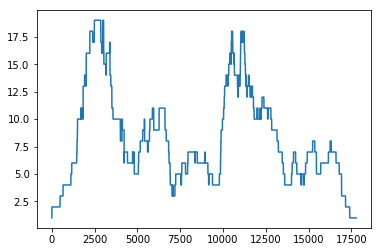

In [108]:
plt.plot(contig.coverage.keys(), contig.coverage.values())

In [111]:
len(contig.read_positions), len(lrd_report.records)

(91, 92)

In [112]:
contig.read_positions["ab3606e5-0041-4da0-9db5-6a30aedd8b83"]

11030

In [113]:
contig.read_positions["4a47c299-3a7d-4d5e-8670-12bd357bb21e"]

11223

In [114]:
contig.read_positions["b988001c-6155-4fa8-8300-2ec01c12eeb1"]

11643

# Overlap graph

In [117]:
long_reads = {r_id: record.string for r_id, record in lrd_report.records.items()}

In [173]:
len(long_reads)

def get_hds(long_reads, min_ident=0.9, min_overlap=400): # ~70kb overlap
    hds = {}
    for r_id1, s1 in long_reads.items():
        for r_id2, s2 in long_reads.items():
            if r_id1 >= r_id2: continue
            res12 = identity_shift(s1, s2, min_overlap=min_overlap)
            res21 = identity_shift(s2, s1, min_overlap=min_overlap)
            score12 = (res12['id'], res12['len'])
            score21 = (res21['id'], res21['len'])
            
            if len(res12['alt_shifts']) and len(res21['alt_shifts']):
                continue
            if len(res12['alt_shifts']) or score21 > score12:
                res = res21
                pair = (r_id2, r_id1)
            elif len(res21['alt_shifts']) or score12 > score21:
                res = res12
                pair = (r_id1, r_id2)
            if res['id'] > min_ident:
                hds[pair] = res
                print(r_id1[:8], r_id2[:8], res)
    return hds           

In [174]:
hds = get_hds(long_reads)

KeyboardInterrupt: 

In [175]:
len(hds)

406

In [177]:
hds_graph = nx.DiGraph()

for pair, hd in hds.items():
    #if hd['id'] > 0.99:
    hds_graph.add_edge(*pair, weight=hd['len'])

In [179]:
nx.number_strongly_connected_components(hds_graph)

22

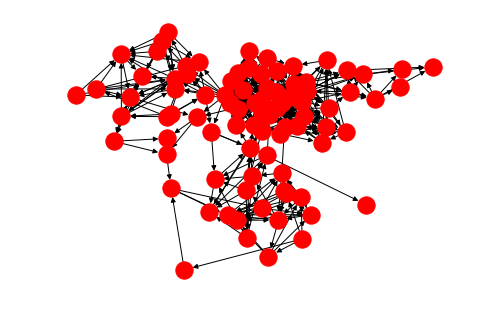

In [180]:
nx.draw_kamada_kawai(hds_graph)

In [181]:
nx.is_directed_acyclic_graph(hds_graph)

False

In [186]:
for node in hds_graph.nodes:
    if hds_graph.in_degree(node) == 0:
        print(node)

0c50866b-f780-4551-a4bb-aa35a72f3f4d
ca0eeaaf-2aee-4e3e-9134-acca35d636ad
e1e9d70e-c20b-47fe-89b3-8777b85ccc43
4a47c299-3a7d-4d5e-8670-12bd357bb21e
7e466664-3a39-4e9c-8b2e-d07ecafd6769
3d0bd9d9-7656-43d6-9929-32a0151bd996
6670710d-44a8-4746-b50c-66315a84eb30


In [187]:
"ab79a298-1f1a-44da-a174-6a52ae8abfcd" in hds_graph.nodes

True

In [189]:
list(hds_graph.neighbors("ab79a298-1f1a-44da-a174-6a52ae8abfcd"))

['11416399-75e7-4251-824f-c17721a01605',
 '44881201-9746-4ce0-9a88-b6d3b97045af',
 '4578e1fd-b534-433e-87af-9e88fbdf48c1',
 'aca29862-0b10-4c27-875f-048ff5a6cb82',
 'ee68ff9e-5a90-48bd-b8bf-b4a3e2e546a1']

# DeBr approach

In [417]:
lrd_report.records['ab79a298-1f1a-44da-a174-6a52ae8abfcd'].split_strings

['AQ',
 'K',
 'JKLMNOPQ',
 'RABHIEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGH',
 'JKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJ',
 'LMNOPQRABCDEFGHIJKLMNOPQRADEFGHIJKLMNOPQRABCDEFGHI

In [479]:
class DeBruijnGraph:
    def __init__(self, k):
        self.graph = nx.MultiDiGraph()
        self.k = k

    def add_kmer(self, kmer, color='black', coverage=1):
        self.graph.add_edge(kmer[:-1], kmer[1:],
                            edge_kmer=kmer,
                            color=color,
                            coverages=[coverage],
                            length=self.k)

    def add_kmers(self, kmers, color='black', coverage=None):
        for kmer in kmers:
            if coverage is None:
                self.add_kmer(kmer, color=color)
            else:
                self.add_kmer(kmer, color=color, coverage=coverage[kmer])
                
    def collapse_nonbranching_paths(self):
        def node_on_nonbranching_path(graph, node):
            return nx.number_of_nodes(graph) > 1 \
                and graph.in_degree(node) == 1 \
                and graph.out_degree(node) == 1

        for node in list(self.graph.nodes()):
            if node_on_nonbranching_path(self.graph, node):
                in_edge = list(self.graph.in_edges(node, keys=True))[0]
                out_edge = list(self.graph.out_edges(node, keys=True))[0]
                # in_edge_color = self.graph.edges[in_edge]['color']
                # out_edge_color = self.graph.edges[out_edge]['color']
                in_edge_kmer = self.graph.edges[in_edge]['edge_kmer']
                out_edge_kmer = self.graph.edges[out_edge]['edge_kmer']
                in_edge_cov = self.graph.edges[in_edge]['coverages']
                out_edge_cov = self.graph.edges[out_edge]['coverages']

                in_node = in_edge[0]
                out_node = out_edge[1]

                new_kmer = in_edge_kmer + \
                    out_edge_kmer[-(len(out_edge_kmer)-self.k+1):]
                new_coverages = in_edge_cov + out_edge_cov
                new_coverages.sort()
                self.graph.add_edge(in_node, out_node,
                                    edge_kmer=new_kmer,
                                    # color=in_edge_color,
                                    coverages=new_coverages,
                                    length=k+len(new_coverages)-1)
                self.graph.remove_node(node)


In [436]:
kmers = []
k = 100
for record in lrd_report.records.values():
    kmers += [record.string[i:i+k] for i in range(len(record.string)-k+1)]
    #for string in record.split_strings:
        #if len(string) < k:
        #    continue
        #kmers += [string[i:i+k] for i in range(len(string)-k+1)]
kmers = Counter(kmers)

len(kmers)

kmers = {kmer: val for kmer, val in kmers.items() if 30 > val >= 3}
len(kmers)

debr = DeBruijnGraph(k=k)
debr.add_kmers(kmers.keys(), coverage=kmers)
debr.collapse_nonbranching_paths()

In [440]:
for cc in nx.weakly_connected_components(debr.graph):
    #if (len(cc)) < 25:
    #    print(cc)
    print(len(cc))
    #print(cc)

38
10
9
17
9
2
2
2
2
8
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [441]:
[nx.is_directed_acyclic_graph(debr.graph.subgraph(cc)) for cc in nx.weakly_connected_components(debr.graph)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [442]:
nice_cx_debr_graph = ndex2.create_nice_cx_from_networkx(debr.graph)

nice_cx_debr_graph.upload_to(server='public.ndexbio.org', username = 'seryrzu',
                             password = 'Kxoq)V?Z]vrgt87x*XO,:we)U&RwEEG!')

Generating CX


'http://public.ndexbio.org/v2/network/c41ba4ac-e56e-11e9-bb65-0ac135e8bacf'

In [443]:
for edge in debr.graph.edges():
    print(len(debr.graph.get_edge_data(*edge)[0]['edge_kmer']))

107
198
198
100
177
102
184
135
117
102
114
117
102
120
102
102
100
102
101
152
114
102
102
102
105
105
111
102
102
102
102
111
102
118
117
114
112
201
100
107
101
123
110
114
102
111
105
105
102
102
148
148
102
102
102
114
105
105
105
117
105
102
102
101
101
157
120
250
100
164
102
102
102
102
106
105
108
108
108
108
114
105
105
100
102
152
101
145
109
105
113
103
198
101
112
137
198
198
105
101
136
100
138
102
110
100
101
139
102
108
108


In [508]:
for r_id, record in lrd_report.records.items():
    for string in record.split_strings:
        if "KLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKL" \
            in string:
            print(r_id)

3d0bd9d9-7656-43d6-9929-32a0151bd996
7e28e345-ded4-429a-86fb-4380067400b9
c10071b2-8347-4e98-9221-26601f2e1119
ce070564-f0c6-4a54-8af5-24a1b7c7a723
d17e2ed7-1824-419c-9654-f9322f9c40b9
e292a036-e0a2-458b-8ee2-8e61272844a3


In [418]:
for r_id, record in lrd_report.records.items():
    for string in record.split_strings:
        if "FGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJ" \
            in string:
            print(r_id)

2150aca2-413b-4207-ab2d-ac2f390a625d
3fe71162-23e4-4db0-948c-5297c0299554
459cabbd-30ad-4a2a-985a-5983b49e50ff
5a4200d7-6028-47b3-8c1c-54a13d13fcbb
aa146b6e-cb52-4fab-b0f4-8e46732b70af
c5bb3e14-3a0b-41f2-9b0f-2007cd12591f
d2f81138-e67b-4063-bdeb-3a4f5f9c31e0
fef38d1f-f393-41b9-af54-f075dbf37f27


In [419]:
for r_id, record in lrd_report.records.items():
    for string in record.split_strings:
        if "FGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCD" \
            in string:
            print(r_id)

13b093b1-6dd5-4fbe-9a41-0c927ef131ff
23bd770d-5c4c-4080-81e5-c51ef2ed5959
d84eb6b3-6e9a-4fa0-8934-3594a7518977
e7f9d7d2-9144-4693-b36e-e5c7e1fce608


In [420]:
def get_rids_kmer(kmer, lrd_report=lrd_report):
    for r_id, record in lrd_report.records.items():
        for string in record.split_strings:
            if kmer in string:
                print(r_id)

In [421]:
kmer=\
"FGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMN"
get_rids_kmer(kmer)

3bcc8728-dcc2-49d2-9b1f-f61609e3d373
5ae8a1b8-626c-4189-a795-3f16956e6121
64b137f0-6d19-47ba-8c2e-5043aedaf494
696cdd6a-f7cc-4e90-9e78-19173b47543e
9f8b5deb-7ccb-4401-a482-1787e071a1d2
ad5bb35b-1514-4dc9-a6c5-625233092167
bee10b9a-2130-48fe-ae17-ab10d9f1f4bf
d84eb6b3-6e9a-4fa0-8934-3594a7518977
fb0f4159-0145-451f-886b-a8b0564c982b


# Overlaps

In [530]:
lrd_report_fn = '/Poppy/abzikadze/centroFlye/centroFlye_repo/data/rel3_cen6_Karen_spreadsheet/LRD/decomposition.tsv'
monomers_fn = "/Poppy/abzikadze/tandem_flye/data/human/isolated_centromeres/extracted_HORs/CEN6/monomers/inferred_monomers_single.fa"

lrd_report = LRD_Report(lrd_report_fn=lrd_report_fn, monomers_fn=monomers_fn)
reads = {r_id: record.string for r_id, record in lrd_report.records.items()}

# split strings
# min_len = 100
# reads = {}
# for r_id, record in lrd_report.records.items():
#     for i, string in enumerate(record.split_strings):
#          if len(string) > min_len:
#             reads[f'{r_id}-{i}'] = string
#             if r_id == "e1e9d70e-c20b-47fe-89b3-8777b85ccc43":
#                print(record.string, len(string), f'{r_id}-{i}')

def get_overlaps(reads, min_ident=0.9, min_overlap=100, match_char=set('=')): # ~17kb overlap
    pref_overlaps = defaultdict(lambda: defaultdict(int))
    suf_overlaps = defaultdict(lambda: defaultdict(int))
    for r_id1, s1 in reads.items():
        for r_id2, s2 in reads.items():
            if r_id1 >= r_id2: continue
            res12 = identity_shift(s1, s2, min_overlap=min_overlap, match_char=match_char)
            res21 = identity_shift(s2, s1, min_overlap=min_overlap, match_char=match_char)
            score12 = (res12['id'], res12['len'])
            score21 = (res21['id'], res21['len'])
            if (len(res12['alt_shifts']) and len(res21['alt_shifts'])) or \
                (res12['len'] is None and res21['len'] is None):
                continue
            if len(res21['alt_shifts']) == 0 and (res12['len'] is None or res21['len'] > res12['len']) and \
                    res21['id'] > min_ident:
                pref_overlaps[r_id1][r_id2] = res21
                suf_overlaps[r_id2][r_id1] = res21
                print(r_id2[:8], r_id1[:8], res21)
            elif len(res12['alt_shifts']) == 0 and (res21['len'] is None or res12['len'] > res21['len']) and \
                    res12['id'] > min_ident:
                pref_overlaps[r_id2][r_id1] = res12
                suf_overlaps[r_id1][r_id2] = res12
                print(r_id1[:8], r_id2[:8], res12)
    return pref_overlaps, suf_overlaps      

pref_overlaps, suf_overlaps = get_overlaps(reads)

In [382]:
short_names = {f'{r_id[:8]}-{r_id.split("-")[-1]}': r_id for r_id in reads}

In [385]:
reads[short_names['fd7ab94c-0']]

'GHIJKLMNOPQRABFGHIJKLMNODEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABFGHIJKLMNOPQRABC

# Contig extension (Oct 1)

In [386]:
class MonomerContig:
    def __init__(self, min_cov=2):
        self.max_pos = 0
        self.monomers = defaultdict(Counter)
        self.read_positions = {}
        self.coverage = defaultdict(int)
        self.min_cov = min_cov
        self.string = ''

    def update_max_pos(self):
        if len(self.monomers):
            self.max_pos = max(self.monomers.keys())
        else:
            self.max_pos = 0
    
    def update_string(self):
        new_string = [0] * (self.max_pos + 1)
        for i, monomer_distr in self.monomers.items():
            if max(monomer_distr.values()) > self.min_cov:
                new_string[i] = max(monomer_distr.items(),
                                    key=operator.itemgetter(1))[0]
            else:
                new_string[i] = '='
        self.string = ''.join(new_string)

    def add_read(self, r_id, monomer_string, position):
        self.read_positions[r_id] = position
        new_freq_kmers = []
        for i, monomer in enumerate(monomer_string):
            # print(self.monomers[i+position][monomer])
            self.coverage[i + position] += 1
            self.monomers[i + position][monomer] += 1
            # print(self.monomers[i+position][monomer])
            
        self.update_max_pos()
        self.update_string()
        # assert len(set(new_freq_kmers)) == len(new_freq_kmers)

    # def calc_inters_score(self, monomer_string,
    #                      min_overlap=100,
    #                      verbose=False):
    #    hd = identity_shift(self.string,
    #                        monomer_string,
    #                        min_overlap=min_overlap)
    #    return hd

def update_mapping_scores(contig, added_r_id, added_read, position,
                          pref_overlaps, suf_overlaps, min_overlap,
                          scores=None):
    if scores is None:
        scores = defaultdict(lambda: defaultdict(list))
    for r_id, hd in pref_overlaps[added_r_id].items():
        if hd['len'] >= min_overlap:
            scores[r_id][position-hd['shift']].append(hd['len'])
    for r_id, hd in suf_overlaps[added_r_id].items():
        if hd == 0:
            continue
        if hd['len'] >= min_overlap:
            scores[r_id][position+hd['shift']].append(hd['len'])    
    return scores

def add_reads(reads, fst_read_id, pref_overlaps, suf_overlaps, min_overlap, min_ident, match_char=set('=')):
    contig = MonomerContig()
    contig.add_read(first_read, reads[first_read], 0)
    scores = update_mapping_scores(contig=contig,
                                   added_r_id=fst_read_id,
                                   added_read=reads[fst_read_id],
                                   position=0,
                                   pref_overlaps=pref_overlaps,
                                   suf_overlaps=suf_overlaps,
                                   min_overlap=min_overlap)
    # print(scores)
    print(contig.string)
    unused_reads = set(reads.keys())
    unused_reads.remove(fst_read_id)
    while len(unused_reads):
        best_r_id, best_score, best_pos = None, (0, 0), None
        for r_id in unused_reads:
            best_rid_score, best_rid_pos = 0, None
            for pos in scores[r_id]:
                score = sum(scores[r_id][pos])
                if score > best_rid_score:
                    best_rid_score = score
                    best_rid_pos = pos
            if best_rid_pos is None:
                continue
            cntg_sbstr_start = best_rid_pos # + min(contig.monomers.keys())
            cntg_sbstr = contig.string[cntg_sbstr_start:]
            hd, overlap = \
                hamming_distance(cntg_sbstr,
                                 reads[r_id],
                                 match_char=set('='))
            ident = 1 - hd / overlap
            if ident < min_ident:
                continue
            score = (ident, best_rid_score)
            #print(score)
            if score > best_score:
                best_score = score
                best_r_id = r_id
                best_pos = best_rid_pos
        print(best_r_id, best_score, best_pos, scores[best_r_id][best_pos])
        if best_r_id is None:
            break
        contig.add_read(best_r_id, reads[best_r_id], best_pos)
        scores = update_mapping_scores(contig=contig,
                                       added_r_id=best_r_id,
                                       added_read=reads[best_r_id],
                                       position=best_pos,
                                       pref_overlaps=pref_overlaps,
                                       suf_overlaps=suf_overlaps,
                                       scores=scores,
                                       min_overlap=min_overlap)
        # print(contig.string)
        unused_reads.remove(best_r_id)
    return contig

In [415]:
# prefix_reads = \
# {r_id: reads[r_id] for r_id in ["ab79a298-1f1a-44da-a174-6a52ae8abfcd",
#                                "e1e9d70e-c20b-47fe-89b3-8777b85ccc43"]}
# non_prefix_reads = \
# {r_id: record for r_id, record in reads.items() if r_id not in prefix_reads}

# assert len(reads) == len(prefix_reads) + len(non_prefix_reads)
                                
first_read = "ab79a298-1f1a-44da-a174-6a52ae8abfcd-3"
# first_read = "e1e9d70e-c20b-47fe-89b3-8777b85ccc43-1"
# first_read = "fef38d1f-f393-41b9-af54-f075dbf37f27"
# first_read = "ca8a1da5-bfdd-4943-a6f0-0d7f342a74e4"
# first_read = "01f80610-395e-4ef8-93d0-526989b8cb53"

In [416]:
contig = add_reads(reads=reads, fst_read_id=first_read, pref_overlaps=pref_overlaps, suf_overlaps=suf_overlaps,
                   min_ident=0.8,
                   min_overlap=100)

3d0bd9d9-7656-43d6-9929-32a0151bd996-2 (1.0, 315) -268 [315]
4578e1fd-b534-433e-87af-9e88fbdf48c1-1 (1.0, 625) -3 [311, 314]
d17e2ed7-1824-419c-9654-f9322f9c40b9-0 (1.0, 629) -262 [315, 314]
81509345-296d-4e7d-9f59-b81d0cf7cb51-3 (1.0, 1373) 120 [350, 1023]
e292a036-e0a2-458b-8ee2-8e61272844a3-1 (1.0, 2358) 36 [1335, 1023]
7e28e345-ded4-429a-86fb-4380067400b9-0 (1.0, 3661) 52 [1319, 1023, 1319]
b6b65f51-d813-4a3a-a3e1-45c5ecb241df-0 (1.0, 2589) 528 [658, 615, 658, 658]
3d0bd9d9-7656-43d6-9929-32a0151bd996-9 (1.0, 2797) 729 [642, 414, 642, 642, 457]
c10071b2-8347-4e98-9221-26601f2e1119-0 (1.0, 1795) 975 [396, 396, 396, 211, 396]
13b093b1-6dd5-4fbe-9a41-0c927ef131ff-2 (1.0, 1184) 56 [296, 296, 296, 296]
5a4200d7-6028-47b3-8c1c-54a13d13fcbb-0 (1.0, 1115) 549 [223, 223, 223, 223, 223]
054f1983-9204-4889-936a-64ab45e7810c-2 (1.0, 1098) 159 [183, 183, 183, 183, 183, 183]
aca29862-0b10-4c27-875f-048ff5a6cb82-5 (1.0, 1075) 103 [215, 215, 215, 215, 215]
ce070564-f0c6-4a54-8af5-24a1b7c7a723-0 (1

In [413]:
len(contig.monomers), len(contig.monomers) * 171

(1766, 301986)

In [414]:
for r_id, monomer in contig.monomers.items():
    print(r_id, monomer)

0 Counter({'R': 14, 'O': 13, 'Q': 1, 'P': 1, 'L': 1})
1 Counter({'A': 14, 'P': 13, 'R': 1, 'Q': 1, 'M': 1})
2 Counter({'B': 14, 'Q': 13, 'A': 1, 'L': 1, 'N': 1})
3 Counter({'R': 13, 'C': 12, 'H': 2, 'B': 1, 'M': 1, 'O': 1})
4 Counter({'A': 13, 'D': 12, 'I': 2, 'C': 1, 'N': 1, 'P': 1})
5 Counter({'E': 14, 'B': 13, 'D': 1, 'O': 1, 'Q': 1})
6 Counter({'F': 27, 'E': 1, 'P': 1, 'R': 1})
7 Counter({'G': 27, 'F': 1, 'Q': 1, 'A': 1})
8 Counter({'H': 27, 'G': 1, 'R': 1, 'B': 1})
9 Counter({'I': 27, 'H': 1, 'A': 1, 'C': 1})
10 Counter({'J': 27, 'D': 2, 'I': 1})
11 Counter({'K': 28, 'E': 2, 'J': 1})
12 Counter({'L': 28, 'F': 2, 'K': 1})
13 Counter({'M': 28, 'G': 2, 'L': 1})
14 Counter({'N': 28, 'H': 2, 'M': 1})
15 Counter({'O': 28, 'I': 2, 'N': 1})
16 Counter({'P': 28, 'J': 2, 'O': 1})
17 Counter({'Q': 28, 'K': 2, 'P': 1})
18 Counter({'R': 28, 'L': 2, 'Q': 1})
19 Counter({'A': 29, 'M': 2, 'R': 1})
20 Counter({'B': 29, 'N': 2, 'A': 1})
21 Counter({'C': 27, 'F': 2, 'O': 2, 'B': 1})
22 Counter({'D':

1080 Counter({'O': 9, 'L': 1, 'D': 1})
1081 Counter({'P': 9, 'M': 1, 'E': 1})
1082 Counter({'Q': 9, 'N': 1, 'F': 1})
1083 Counter({'R': 9, 'O': 1, 'G': 1})
1084 Counter({'A': 9, 'P': 1, 'H': 1})
1085 Counter({'B': 9, 'Q': 1, 'I': 1})
1086 Counter({'C': 9, 'R': 1, 'J': 1})
1087 Counter({'D': 9, 'A': 1, 'K': 1})
1088 Counter({'E': 9, 'B': 1, 'L': 1})
1089 Counter({'F': 9, 'C': 1, 'M': 1})
1090 Counter({'G': 9, 'D': 1, 'N': 1})
1091 Counter({'H': 9, 'E': 1, 'O': 1})
1092 Counter({'I': 9, 'F': 1, 'P': 1})
1093 Counter({'J': 9, 'G': 1, 'Q': 1})
1094 Counter({'K': 9, 'H': 1, 'R': 1})
1095 Counter({'L': 9, 'I': 1, 'A': 1})
1096 Counter({'M': 9, 'J': 1, 'B': 1})
1097 Counter({'N': 9, 'K': 1, 'F': 1})
1098 Counter({'O': 9, 'L': 1, 'G': 1})
1099 Counter({'P': 9, 'M': 1, 'H': 1})
1100 Counter({'Q': 9, 'N': 1, 'I': 1})
1101 Counter({'R': 9, 'O': 1, 'J': 1})
1102 Counter({'A': 9, 'P': 1, 'K': 1})
1103 Counter({'B': 9, 'Q': 1, 'L': 1})
1104 Counter({'F': 9, 'R': 1, 'M': 1})
1105 Counter({'G': 9, 'A'

In [352]:
pref_overlaps['b988001c-6155-4fa8-8300-2ec01c12eeb1']

defaultdict(int,
            {'27685c3b-d97c-4eeb-bcc0-08890bb2ee66': {'alt_shifts': [],
              'hd': 16,
              'id': 0.9069767441860466,
              'len': 172,
              'shift': 620},
             '3fe71162-23e4-4db0-948c-5297c0299554': {'alt_shifts': [],
              'hd': 0,
              'id': 1.0,
              'len': 155,
              'shift': 1389},
             '4a47c299-3a7d-4d5e-8670-12bd357bb21e': {'alt_shifts': [],
              'hd': 114,
              'id': 0.905,
              'len': 1200,
              'shift': 417},
             'd17e2ed7-1824-419c-9654-f9322f9c40b9': {'alt_shifts': [],
              'hd': 9,
              'id': 0.9579439252336449,
              'len': 214,
              'shift': 1647}})

In [354]:
reads['e1e9d70e-c20b-47fe-89b3-8777b85ccc43']

'AO==LJKLMNOPQRARABHIEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKL=N==QRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEF=HIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRADEFGHIJKLMNOPQRABCDEFGHIJKLMNOPQRADEFGHIJKLM

# DeBr on Karen's assembly

In [452]:
from string import ascii_uppercase


In [453]:
man_assembly_fn = "/Poppy/abzikadze/centroFlye/centroFlye_repo/data/D6Z1/CEN6_ManVERSION3.tsv"

units = []
with open(man_assembly_fn) as f:
    for line in f:
        line = line.strip().split('\t')
        st, en = int(line[-2]), int(line[-1])
        if en < 17:
            en -= 1
        units.append((st, en))

In [879]:
def units2monomers(units):
    monomers = []
    for (s, e) in units:
        monomers.append(ascii_uppercase[s:e+1])
    monomers = ''.join(monomers)
    return monomers

In [880]:
ref_monomers = units2monomers(units)

In [881]:
len(ref_monomers)

17752

In [882]:
k = 800
kmers = [ref_monomers[i:i+k] for i in range(len(ref_monomers) - k + 1)]

kmers = Counter(kmers)

# len(kmers)

# kmers = {kmer: val for kmer, val in kmers.items() if 30 > val >= 3}

debr = DeBruijnGraph(k=k)
debr.add_kmers(kmers.keys(), coverage=kmers)
debr.collapse_nonbranching_paths()

In [486]:
# nice_cx_debr_graph = ndex2.create_nice_cx_from_networkx(debr.graph)

# nice_cx_debr_graph.upload_to(server='public.ndexbio.org', username = 'seryrzu',
#                              password = 'Kxoq)V?Z]vrgt87x*XO,:we)U&RwEEG!')

Generating CX


'http://public.ndexbio.org/v2/network/9e43bb71-e628-11e9-bb65-0ac135e8bacf'

In [590]:
k=200
def get_kmer_pos(string, k):
    pos = defaultdict(list)
    for i in range(len(string)-k+1):
        pos[string[i:i+k]].append(i)
    return pos

pos = get_kmer_pos(string=monomers, k=k)
unique_kmers = set(kmer for kmer, p in pos.items() if len(p) == 1)

In [591]:
np.mean([len(x) <= 1 for x in pos.values()])

0.83478755690440065

In [592]:
def plot_unique(pos):
    unique_pos = []
    for p in pos.values():
        if len(p) == 1:
            unique_pos.append(p[0])
    plt.bar(unique_pos, height=1)

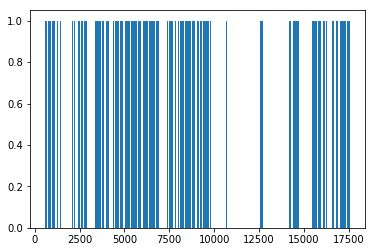

In [593]:
plot_unique(pos)

# Overlaps wrt unique kmers

In [814]:
# lrd_report_fn = '/Poppy/abzikadze/centroFlye/centroFlye_repo/data/rel3_cen6_Karen_spreadsheet/LRD/decomposition.tsv'
lrd_report_fn = '/Poppy/abzikadze/centroFlye/centroFlye_repo/experiments/20191007/lrd_d6z1_rel3_Karen/decomposition.tsv'

monomers_fn = "/Poppy/abzikadze/tandem_flye/data/human/isolated_centromeres/extracted_HORs/CEN6/monomers/inferred_monomers_single.fa"

lrd_report = LRD_Report(lrd_report_fn=lrd_report_fn, monomers_fn=monomers_fn)
reads = {r_id: record.string for r_id, record in lrd_report.records.items()}

# split strings
# min_len = 100
# reads = {}
# for r_id, record in lrd_report.records.items():
#     for i, string in enumerate(record.split_strings):
#          if len(string) > min_len:
#             reads[f'{r_id}-{i}'] = string
#             if r_id == "e1e9d70e-c20b-47fe-89b3-8777b85ccc43":
#                print(record.string, len(string), f'{r_id}-{i}')

def get_overlaps(reads, kmers, min_ident=0.9, min_overlap=100, match_char=set('=')): # ~17kb overlap
    kmers = set(kmers)
    k = len(list(kmers)[0])
    pref_overlaps = defaultdict(lambda: defaultdict(int))
    suf_overlaps = defaultdict(lambda: defaultdict(int))
    for r_id1, s1 in reads.items():
        for r_id2, s2 in reads.items():
            if r_id1 >= r_id2: continue
            res12 = identity_shift(s1, s2, min_overlap=min_overlap, match_char=match_char)
            res21 = identity_shift(s2, s1, min_overlap=min_overlap, match_char=match_char)
            kmer_set12 = set(s1[i:i+k] for i in range(res12['shift'], len(s1)-k+1)) & \
                         set(s2[i:i+k] for i in range(res12['len']-k+1)) & kmers
            kmer_set21 = set(s2[i:i+k] for i in range(res21['shift'], len(s2)-k+1)) & \
                         set(s1[i:i+k] for i in range(res21['len']-k+1)) & kmers
            res12['kmer_score'] = len(kmer_set12)
            res21['kmer_score'] = len(kmer_set21)
            
            score12 = (res12['kmer_score'], res12['id'], res12['len'])
            score21 = (res21['kmer_score'], res21['id'], res21['len'])
            # print(r_id1[:8], r_id2[:8])
            # print(score12)
            # print(score21)
            # print("")
            if (len(res12['alt_shifts']) and len(res21['alt_shifts'])) or \
                (res12['len'] is None and res21['len'] is None):
                continue
            if len(res21['alt_shifts']) == 0 and (res12['len'] is None or res21['len'] > res12['len']) and \
                    res21['id'] > min_ident:
                pref_overlaps[r_id1][r_id2] = res21
                suf_overlaps[r_id2][r_id1] = res21
                print(r_id2[:8], r_id1[:8], res21)
            elif len(res12['alt_shifts']) == 0 and (res21['len'] is None or res12['len'] > res21['len']) and \
                    res12['id'] > min_ident:
                pref_overlaps[r_id2][r_id1] = res12
                suf_overlaps[r_id1][r_id2] = res12
                print(r_id1[:8], r_id2[:8], res12)
    return pref_overlaps, suf_overlaps      

# pref_overlaps, suf_overlaps = get_overlaps(reads, kmers=unique_kmers)

In [605]:
class OverlapGraph:
    def __init__(self, pref_overlaps, min_id=0.9, min_len=100, min_kmer_score=10):
        self.graph = nx.MultiDiGraph()
        for r_id1 in pref_overlaps:
            for r_id2 in pref_overlaps[r_id1]:
                score = pref_overlaps[r_id1][r_id2]
                if score['id'] >= min_id and score['len'] >= min_len and score['kmer_score'] >= min_kmer_score:
                    self.graph.add_edge(r_id1, r_id2, weight=score)
                    # print(score)

In [606]:
ogr = OverlapGraph(pref_overlaps)

In [607]:
nx.is_directed_acyclic_graph(ogr.graph)

True

In [608]:
for cc in nx.weakly_connected_components(ogr.graph):
    print(len(cc), cc)

53 {'68c5a50e-34de-430b-bd0f-feb62429620a', '3bcc8728-dcc2-49d2-9b1f-f61609e3d373', '63fa9a7e-2c00-49fb-905d-27fea8181b9e', '86fdd7a8-71b5-46fa-90d2-5e6888ae2289', 'e7f9d7d2-9144-4693-b36e-e5c7e1fce608', '7e466664-3a39-4e9c-8b2e-d07ecafd6769', '13b093b1-6dd5-4fbe-9a41-0c927ef131ff', '347cb721-6ad0-4df3-9bd2-4bc0a3c08c8d', '35aded7d-a60e-4628-ab38-4fd91010c0f6', '5a4200d7-6028-47b3-8c1c-54a13d13fcbb', '6e54ff5e-7a55-4dad-bae3-004d255dddbd', '459cabbd-30ad-4a2a-985a-5983b49e50ff', '1b4bd09e-07f3-4455-b041-c4599b6fbe3d', '5ae8a1b8-626c-4189-a795-3f16956e6121', '989d6a9b-96ec-413c-bc8b-03b96737e87d', '23bd770d-5c4c-4080-81e5-c51ef2ed5959', '9a00652d-1cf5-4a25-8d2f-638c26577e59', 'c5bb3e14-3a0b-41f2-9b0f-2007cd12591f', '2fef785e-910e-4071-87f5-ba59052d4f7f', 'fef38d1f-f393-41b9-af54-f075dbf37f27', 'ee68ff9e-5a90-48bd-b8bf-b4a3e2e546a1', '3fe71162-23e4-4db0-948c-5297c0299554', 'e1e9d70e-c20b-47fe-89b3-8777b85ccc43', '535aa52e-6acc-4f47-af7f-e728e2b8c0bc', 'fd7ab94c-96fc-4448-bb9d-2c7a86d777b

In [680]:
def longest_path(gr):
    assert nx.is_directed_acyclic_graph(gr)
    weights = defaultdict(int)
    prev = defaultdict(lambda: None)
    for v in nx.topological_sort(gr):
        #print(v)
        for edge in gr.out_edges(v):
            #print(edge)
            assert edge[0] == v
            u = edge[1]
            #print(weights[v], gr.edges[(*edge, 'weight')])
            new_weight = weights[v] + gr.edges[(*edge, 0)]['weight']['len']
            if new_weight > weights[u]:
                weights[u] = new_weight
                prev[u] = v
    end, end_weight = None, 0
    for node, weight in weights.items():
        if weight > end_weight:
            end = node
            end_weight = weight
    print(end_weight)
    
    node = end
    path = [node]
    while weights[node] != 0:
        node = prev[node]
        path.append(node)
    path = path[::-1]
    return path

In [681]:
ogr.graph.subgraph('535aa52e-6acc-4f47-af7f-e728e2b8c0bc').edges

OutMultiEdgeView([])

In [682]:
for cc in nx.weakly_connected_components(ogr.graph):
    path = longest_path(ogr.graph.subgraph(cc))
    print(path)

25513
['0c0dd3f7-6828-447b-ac53-1d118b0270a0', '5ae8a1b8-626c-4189-a795-3f16956e6121', '28c20ccf-1628-4edb-9382-36b011dbdd3a', '4fe14776-2f0f-47b3-84a6-460839569e79', '3bcc8728-dcc2-49d2-9b1f-f61609e3d373', '7bacbcf9-5c10-4e40-b09c-5b8c07ec0470', 'd84eb6b3-6e9a-4fa0-8934-3594a7518977', 'e7f9d7d2-9144-4693-b36e-e5c7e1fce608', 'fef38d1f-f393-41b9-af54-f075dbf37f27', '3fe71162-23e4-4db0-948c-5297c0299554', 'e98f9879-3e90-4503-a35e-54d944e03f98', '86fdd7a8-71b5-46fa-90d2-5e6888ae2289', 'ea8138e6-df5a-4f84-aff5-5d1cb8ca5ed1', '46a4165e-6315-4339-9d4e-3af1ca00b3fc', 'f9774a7d-75d0-4783-8053-ce259920fc2e', 'fd7ab94c-96fc-4448-bb9d-2c7a86d777b9', 'd2f81138-e67b-4063-bdeb-3a4f5f9c31e0', 'c5bb3e14-3a0b-41f2-9b0f-2007cd12591f', 'aff6bdf9-4388-46e6-9aa5-af5c6c88258d', '989d6a9b-96ec-413c-bc8b-03b96737e87d', 'ee68ff9e-5a90-48bd-b8bf-b4a3e2e546a1', '11416399-75e7-4251-824f-c17721a01605', '4578e1fd-b534-433e-87af-9e88fbdf48c1', '2fef785e-910e-4071-87f5-ba59052d4f7f', '1b4bd09e-07f3-4455-b041-c4599b6f

# Kmers from reads vs unique kmers from reference

In [892]:
k=200

In [893]:
def get_read_kmers(reads, k):
    read_kmers = []
    for record in lrd_report.records.values():
        read_kmers += [record.string[i:i+k] for i in range(len(record.string)-k+1)]
        #for string in record.split_strings:
            #if len(string) < k:
            #    continue
            #kmers += [string[i:i+k] for i in range(len(string)-k+1)]
    read_kmers = Counter(read_kmers)
    return read_kmers

def get_reference_kmers(reference, k):
    kmers = [reference[i:i+k] for i in range(len(reference)-k+1)]
    kmer_cnt = Counter(kmers)
    return kmer_cnt

In [894]:
read_kmer_cnt = get_read_kmers(reads, k=k)
ref_kmer_cnt = get_reference_kmers(ref_monomers, k=k)

In [895]:
for kmer in unique_kmers:
    print(read_kmer_cnt[kmer])

0
12
0
15
0
0
11
0
17
19
9
0
13
0
0
14
0
0
11
15
10
4
0
0
14
0
0
14
5
14
14
0
6
0
15
14
13
15
8
0
12
13
9
0
19
22
9
15
13
1
14
17
13
0
14
8
0
0
25
0
0
13
0
13
14
0
0
0
7
6
14
7
0
0
15
0
20
17
0
15
11
12
0
15
0
1
0
15
13
0
15
12
0
6
0
0
0
13
17
0
6
0
14
15
16
0
0
19
0
17
10
15
11
0
13
18
13
5
0
18
14
0
1
16
11
0
8
0
9
16
0
17
15
0
13
17
15
0
12
0
11
9
15
14
15
0
14
0
15
0
14
12
16
0
0
18
13
14
0
18
0
20
6
11
14
0
15
16
0
19
1
15
9
12
15
0
9
9
15
19
22
0
19
0
16
12
13
0
0
18
18
11
19
0
6
0
15
14
13
23
19
16
0
12
22
0
0
0
12
20
13
0
0
27
16
21
12
0
13
0
19
23
12
13
18
14
24
0
0
11
12
0
16
0
0
17
14
15
18
12
0
14
1
23
0
0
12
14
13
8
27
19
0
0
0
0
7
0
11
16
15
13
24
6
12
14
12
23
10
20
11
11
11
15
9
12
14
16
0
13
8
19
8
0
6
21
14
15
15
0
12
0
10
13
11
17
15
0
0
11
21
0
18
16
12
19
3
0
7
0
0
11
0
25
0
13
19
0
17
10
6
14
17
22
20
20
0
14
11
0
25
0
0
3
13
20
0
19
13
14
10
0
12
12
10
0
6
0
14
21
0
12
0
14
20
11
12
0
9
0
25
19
0
20
6
0
13
19
15
23
8
0
0
9
17
20
11
13
15
0
11
0
0
0
0
17
1
13
0
10

12
13
12
12
0
0
10
15
14
14
0
9
11
14
21
4
0
0
12
19
0
8
12
0
0
12
18
0
0
18
10
0
5
17
19
0
18
13
6
0
0
10
14
0
6
8
0
13
11
12
12
15
7
11
8
12
13
25
7
10
13
0
0
24
12
14
18
11
0
8
13
20
0
0
16
18
0
0
15
13
15
19
18
0
23
25
5
19
12
27
13
12
15
0
0
14
18
0
22
24
0
24
8
0
15
19
0
0
0
16
24
13
14
0
13
15
20
13
11
0
14
25
20
22
10
0
20
10
0
23
0
15
0
8
13
9
7
0
0
10
15
17
0
18
13
13
15
20
11
12
0
16
1
8
14
20
13
0
14
0
9
16
12
0
9
5
8
0
0
0
11
0
13
11
0
0
14
0
15
8
1
6
11
0
12
18
6
0
10
15
0
12
18
14
22
13
15
0
13
19
0
0
11
0
1
13
16
17
0
0
19
0
14
0
23
16
11
23
0
13
1
15
0
11
20
12
22
13
0
15
19
0
11
19
10
14
0
16
14
13
0
12
14
15
0
15
18
13
0
18
14
21
17
0
21
10
21
8
18
14
14
0
7
10
17
0
23
11
0
0
8
20
16
18
0
14
19
0
10
11
0
0
0
7
9
19
0
10
4
29
7
14
11
0
0
20
7
9
15
8
0
14
7
13
13
0
11
8
6
13
8
14
0
14
0
10
0
0
0
0
0
19
0
5
12
9
0
0
14
13
6
0
12
0
16
0
0
15
18
13
0
14
23
0
11
11
0
11
17
0
0
10
20
15
23
0
10
14
11
19
7
23
16
8
13
16
14
8
11
15
0
16
18
19
8
9
0
20
25
15
16
22
12
17
0
0
0


In [1013]:
rare_read_kmers = set(kmer for kmer, cnt in read_kmer_cnt.items() if 7 <= cnt <= 30)

rare_read_kmers = set(kmer for kmer, cnt in read_kmer_cnt.items() if 10 <= cnt <= 20)
Counter([ref_kmer_cnt[kmer] for kmer in rare_read_kmers])

Counter({0: 1890, 1: 4355, 2: 172})

In [1014]:
len(rare_read_kmers)

6417

In [1015]:
len(unique_kmers)

8802

In [1016]:
len(unique_kmers & rare_read_kmers)

4355

In [1017]:
len(unique_kmers - rare_read_kmers)

4447

In [1018]:
len(rare_read_kmers - unique_kmers)

2062

In [1019]:
Counter([ref_kmer_cnt[kmer] for kmer in rare_read_kmers])

Counter({0: 1890, 1: 4355, 2: 172})

In [ ]:
pref_overlaps_read_kmers, suf_overlaps_read_kmers = get_overlaps(reads, kmers=rare_read_kmers)

0df7f433 00739941 {'id': 0.9874476987447699, 'shift': 609, 'hd': 3, 'len': 239, 'alt_shifts': [], 'kmer_score': 0}
14eb3993 00739941 {'id': 0.9736842105263158, 'shift': 826, 'hd': 6, 'len': 228, 'alt_shifts': [], 'kmer_score': 0}
00739941 1b4bd09e {'id': 1.0, 'shift': 366, 'hd': 0, 'len': 432, 'alt_shifts': [], 'kmer_score': 117}
1e4593ef 00739941 {'id': 0.9835390946502057, 'shift': 365, 'hd': 4, 'len': 243, 'alt_shifts': [], 'kmer_score': 0}
00739941 1f4000ef {'id': 1.0, 'shift': 254, 'hd': 0, 'len': 544, 'alt_shifts': [], 'kmer_score': 81}
00739941 28717818 {'id': 1.0, 'shift': 408, 'hd': 0, 'len': 390, 'alt_shifts': [], 'kmer_score': 75}
2fef785e 00739941 {'id': 0.965034965034965, 'shift': 1124, 'hd': 10, 'len': 286, 'alt_shifts': [], 'kmer_score': 0}
31700b15 00739941 {'id': 1.0, 'shift': 19, 'hd': 0, 'len': 798, 'alt_shifts': [], 'kmer_score': 54}
3545652f 00739941 {'id': 0.9715639810426541, 'shift': 751, 'hd': 6, 'len': 211, 'alt_shifts': [], 'kmer_score': 0}
35e23dc0 00739941 {'

In [1060]:
ogr = OverlapGraph(suf_overlaps_read_kmers, min_kmer_score=70)

In [1061]:
nx.is_directed_acyclic_graph(ogr.graph)

True

In [1062]:
for cc in nx.weakly_connected_components(ogr.graph):
    print(len(cc))
    # print(len(cc), cc)

219
57
33


In [1063]:
paths = []

for cc in nx.weakly_connected_components(ogr.graph):
    path = longest_path(ogr.graph.subgraph(cc))
    print(path)
    paths.append(path)

76679
['e1e9d70e-c20b-47fe-89b3-8777b85ccc43', '35e23dc0-4219-4951-b491-be041f325bf3', 'f93d3935-7068-41ed-84ad-7b53b5460df5', '7e9301cd-6184-44f7-9db4-849ac08d33a5', '6e54ff5e-7a55-4dad-bae3-004d255dddbd', '42da64e4-e647-4426-b497-cda32cd3ca28', '8f633f5b-eb70-4ab0-94d2-77c708561492', 'df9e6b8f-e94b-4bac-a69e-9e98b1769c42', 'df436222-50d1-4975-861e-58ab06750067', '1f4000ef-a7d9-41ee-9c93-047ca36ae7d8', '5da9ab31-d608-4581-b5fd-37acce77300e', '864c1d5f-e259-4dce-970a-e09f38c5ed96', '1b4bd09e-07f3-4455-b041-c4599b6fbe3d', 'ee68ff9e-5a90-48bd-b8bf-b4a3e2e546a1', '6e3d2a63-0182-4638-9e24-0f600e879cf7', 'a6a9c19c-4049-4312-9e36-aabd8751949c', '2c2202da-61a9-489e-bdc9-8e04e504278f', 'f3a7eb72-23c5-4c60-97d8-be9c7cb6285b', '96779c5c-4eee-4184-ae1c-182e6b5ccb6a', '82911af2-7474-4bce-8ea7-ee12600cac0a', '989d6a9b-96ec-413c-bc8b-03b96737e87d', '4d4353d9-0078-40fa-ac0d-1b3ee5c86319', 'aff6bdf9-4388-46e6-9aa5-af5c6c88258d', 'f79edf05-1c15-4303-9584-b421c5ada908', 'ce13ce67-e783-4984-8d61-7f791875

# Longest paths to contigs

In [1055]:
class MonomerContig:
    def __init__(self, min_cov):
        self.max_pos = 0
        self.monomers = defaultdict(Counter)
        self.read_positions = {}
        self.coverage = defaultdict(int)
        self.min_cov = min_cov
        self.string = ''

    def update_max_pos(self):
        if len(self.monomers):
            self.max_pos = max(self.monomers.keys())
        else:
            self.max_pos = 0
    
    def update_string(self):
        new_string = [0] * (self.max_pos + 1)
        for i, monomer_distr in self.monomers.items():
            if max(monomer_distr.values()) >= self.min_cov:
                new_string[i] = max(monomer_distr.items(),
                                    key=operator.itemgetter(1))[0]
            else:
                new_string[i] = '='
        self.string = ''.join(new_string)

    def add_read(self, r_id, monomer_string, position):
        self.read_positions[r_id] = position
        new_freq_kmers = []
        for i, monomer in enumerate(monomer_string):
            # print(self.monomers[i+position][monomer])
            self.coverage[i + position] += 1
            self.monomers[i + position][monomer] += 1
            # print(self.monomers[i+position][monomer])
            
        self.update_max_pos()
        self.update_string()
    
    @classmethod
    def path2contig(cls, reads, overlaps, path, min_cov=3):
        contig = cls(min_cov=min_cov)
        fst_rid = path[0]
        contig.add_read(fst_rid, reads[fst_rid], position=0)
        for r_id1, r_id2 in zip(path[:-1], path[1:]):
            pos = contig.read_positions[r_id1] + overlaps[r_id1][r_id2]['shift']
            contig.add_read(r_id2, reads[r_id2], position=pos)
        return contig

In [1056]:
contigs = []

for path in paths:
    contig = MonomerContig.path2contig(reads, suf_overlaps_read_kmers, path)
    contigs.append(contig)

In [1059]:
for contig in contigs:
    print(len(contig.string))

11411
3571
3240


In [1046]:
monomers2units(contigs[0].string)

[('=', 66),
 ((14, 17), 1),
 ('Full', 41),
 ((0, 16), 1),
 ((11, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 3),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 2),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 5),
 ((0, 16), 1),
 ((11, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 5),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 8),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ((0, 0), 1),
 ((3, 17), 1),
 ('Full', 12),
 ((0, 0), 1),
 ('=', 329),
 ((7, 17), 1),
 ('Full', 13),
 ((0, 1), 1),
 ((5, 17), 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ('Full', 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ('Full', 15),
 ((0, 1), 1),
 ((5, 17), 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ('Full', 2),
 ((0, 1), 1),
 ((5, 17), 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ('Full', 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ((0, 1), 1),
 ((5, 17), 1),
 ('Full', 1),
 ((0, 1), 1),
 ((5, 17), 1),
 

In [875]:
for i, monomer in contigs[0].monomers.items():
    print(i, monomer)

0 Counter({'A': 1})
1 Counter({'O': 1})
2 Counter({'=': 1})
3 Counter({'=': 1})
4 Counter({'L': 1})
5 Counter({'J': 1})
6 Counter({'K': 1})
7 Counter({'L': 1})
8 Counter({'M': 1})
9 Counter({'N': 1})
10 Counter({'O': 1})
11 Counter({'P': 1})
12 Counter({'Q': 1})
13 Counter({'R': 1})
14 Counter({'A': 1})
15 Counter({'R': 1})
16 Counter({'A': 1})
17 Counter({'B': 1})
18 Counter({'H': 1})
19 Counter({'I': 1})
20 Counter({'E': 1})
21 Counter({'F': 1})
22 Counter({'G': 1})
23 Counter({'H': 1})
24 Counter({'I': 1})
25 Counter({'J': 1})
26 Counter({'K': 1})
27 Counter({'L': 1})
28 Counter({'M': 1})
29 Counter({'N': 1})
30 Counter({'O': 1})
31 Counter({'P': 1})
32 Counter({'Q': 1})
33 Counter({'R': 1})
34 Counter({'A': 1})
35 Counter({'B': 1})
36 Counter({'C': 1})
37 Counter({'D': 1})
38 Counter({'E': 1})
39 Counter({'F': 1})
40 Counter({'G': 1})
41 Counter({'H': 1})
42 Counter({'I': 1})
43 Counter({'J': 1})
44 Counter({'K': 1})
45 Counter({'L': 1})
46 Counter({'M': 1})
47 Counter({'N': 1})
48

1253 Counter({'P': 10})
1254 Counter({'Q': 9})
1255 Counter({'R': 9})
1256 Counter({'A': 9})
1257 Counter({'D': 9})
1258 Counter({'E': 9})
1259 Counter({'F': 9})
1260 Counter({'G': 9})
1261 Counter({'H': 9})
1262 Counter({'I': 9})
1263 Counter({'J': 9})
1264 Counter({'K': 9})
1265 Counter({'L': 9})
1266 Counter({'M': 9})
1267 Counter({'N': 9})
1268 Counter({'O': 9})
1269 Counter({'P': 9})
1270 Counter({'Q': 9})
1271 Counter({'R': 9})
1272 Counter({'A': 9})
1273 Counter({'D': 9})
1274 Counter({'E': 9})
1275 Counter({'F': 9})
1276 Counter({'G': 9})
1277 Counter({'H': 9})
1278 Counter({'I': 9})
1279 Counter({'J': 9})
1280 Counter({'K': 9})
1281 Counter({'L': 9})
1282 Counter({'M': 9})
1283 Counter({'N': 9})
1284 Counter({'O': 9})
1285 Counter({'P': 9})
1286 Counter({'Q': 9})
1287 Counter({'R': 9})
1288 Counter({'A': 9})
1289 Counter({'D': 9})
1290 Counter({'E': 9})
1291 Counter({'F': 9})
1292 Counter({'G': 9})
1293 Counter({'H': 9})
1294 Counter({'I': 9})
1295 Counter({'J': 9})
1296 Count

2753 Counter({'G': 9})
2754 Counter({'H': 9})
2755 Counter({'I': 9})
2756 Counter({'J': 9})
2757 Counter({'K': 9})
2758 Counter({'L': 9})
2759 Counter({'M': 9})
2760 Counter({'N': 9})
2761 Counter({'O': 9})
2762 Counter({'P': 9})
2763 Counter({'Q': 9})
2764 Counter({'R': 9})
2765 Counter({'A': 9})
2766 Counter({'B': 9})
2767 Counter({'C': 9})
2768 Counter({'D': 9})
2769 Counter({'E': 9})
2770 Counter({'F': 9})
2771 Counter({'G': 9})
2772 Counter({'H': 9})
2773 Counter({'I': 9})
2774 Counter({'J': 9})
2775 Counter({'K': 9})
2776 Counter({'L': 9})
2777 Counter({'M': 9})
2778 Counter({'N': 9})
2779 Counter({'O': 9})
2780 Counter({'P': 9})
2781 Counter({'Q': 9})
2782 Counter({'R': 9})
2783 Counter({'A': 9})
2784 Counter({'B': 9})
2785 Counter({'F': 9})
2786 Counter({'G': 9})
2787 Counter({'H': 9})
2788 Counter({'I': 9})
2789 Counter({'J': 9})
2790 Counter({'K': 9})
2791 Counter({'L': 9})
2792 Counter({'M': 9})
2793 Counter({'N': 9})
2794 Counter({'O': 9})
2795 Counter({'P': 9})
2796 Counte

4252 Counter({'D': 11})
4253 Counter({'E': 11})
4254 Counter({'F': 11})
4255 Counter({'G': 11})
4256 Counter({'H': 11})
4257 Counter({'I': 11})
4258 Counter({'J': 11})
4259 Counter({'K': 11})
4260 Counter({'L': 11})
4261 Counter({'M': 11})
4262 Counter({'N': 11})
4263 Counter({'O': 11})
4264 Counter({'P': 11})
4265 Counter({'Q': 11})
4266 Counter({'R': 11})
4267 Counter({'A': 11})
4268 Counter({'B': 11})
4269 Counter({'C': 11})
4270 Counter({'D': 11})
4271 Counter({'E': 11})
4272 Counter({'F': 11})
4273 Counter({'G': 11})
4274 Counter({'H': 11})
4275 Counter({'I': 11})
4276 Counter({'J': 11})
4277 Counter({'K': 11})
4278 Counter({'L': 11})
4279 Counter({'M': 11})
4280 Counter({'N': 11})
4281 Counter({'O': 11})
4282 Counter({'P': 11})
4283 Counter({'Q': 11})
4284 Counter({'R': 11})
4285 Counter({'A': 11})
4286 Counter({'B': 11})
4287 Counter({'C': 11})
4288 Counter({'D': 11})
4289 Counter({'E': 11})
4290 Counter({'F': 11})
4291 Counter({'G': 11})
4292 Counter({'H': 11})
4293 Counter({'I

5752 Counter({'G': 10, 'D': 3})
5753 Counter({'H': 10, 'E': 3})
5754 Counter({'I': 10, 'F': 3})
5755 Counter({'J': 10, 'G': 3})
5756 Counter({'K': 10, 'H': 3})
5757 Counter({'L': 10, 'I': 3})
5758 Counter({'M': 10, 'J': 3})
5759 Counter({'N': 10, 'K': 3})
5760 Counter({'O': 10, 'L': 3})
5761 Counter({'P': 10, 'M': 3})
5762 Counter({'Q': 11, 'N': 3})
5763 Counter({'R': 11, 'O': 3})
5764 Counter({'A': 11, 'P': 3})
5765 Counter({'B': 11, 'Q': 3})
5766 Counter({'F': 11, 'R': 3})
5767 Counter({'G': 11, 'A': 3})
5768 Counter({'H': 11, 'B': 3})
5769 Counter({'I': 11, 'F': 3})
5770 Counter({'J': 11, 'G': 3})
5771 Counter({'K': 11, 'H': 3})
5772 Counter({'L': 11, 'I': 3})
5773 Counter({'M': 11, 'J': 3})
5774 Counter({'N': 11, 'K': 3})
5775 Counter({'O': 11, 'L': 3})
5776 Counter({'P': 11, 'M': 3})
5777 Counter({'Q': 11, 'N': 3})
5778 Counter({'R': 11, 'O': 3})
5779 Counter({'A': 11, 'P': 3})
5780 Counter({'B': 11, 'Q': 3})
5781 Counter({'F': 11, 'R': 3})
5782 Counter({'G': 11, 'A': 3})
5783 Cou

7002 Counter({'C': 10, 'F': 1})
7003 Counter({'D': 10, 'G': 1})
7004 Counter({'E': 10, 'H': 1})
7005 Counter({'F': 10, 'I': 1})
7006 Counter({'G': 10, 'J': 1})
7007 Counter({'H': 10, 'K': 1})
7008 Counter({'I': 10, 'L': 1})
7009 Counter({'J': 10, 'M': 1})
7010 Counter({'K': 10, 'N': 1})
7011 Counter({'L': 10, 'O': 1})
7012 Counter({'M': 10, 'P': 1})
7013 Counter({'N': 10, 'Q': 1})
7014 Counter({'O': 10, 'R': 1})
7015 Counter({'P': 10, 'A': 1})
7016 Counter({'Q': 10, 'B': 1})
7017 Counter({'R': 10, 'C': 1})
7018 Counter({'A': 10, 'D': 1})
7019 Counter({'B': 10, 'E': 1})
7020 Counter({'C': 10})
7021 Counter({'D': 10})
7022 Counter({'E': 10})
7023 Counter({'F': 10})
7024 Counter({'G': 10})
7025 Counter({'H': 10})
7026 Counter({'I': 10})
7027 Counter({'J': 10})
7028 Counter({'K': 10})
7029 Counter({'L': 10})
7030 Counter({'M': 10})
7031 Counter({'N': 10})
7032 Counter({'O': 10})
7033 Counter({'P': 10})
7034 Counter({'Q': 10})
7035 Counter({'R': 10})
7036 Counter({'A': 10})
7037 Counter({'B

8752 Counter({'G': 12})
8753 Counter({'H': 12})
8754 Counter({'I': 12})
8755 Counter({'J': 11, '=': 1})
8756 Counter({'K': 12})
8757 Counter({'L': 12})
8758 Counter({'M': 12})
8759 Counter({'N': 12})
8760 Counter({'O': 12})
8761 Counter({'P': 12})
8762 Counter({'Q': 12})
8763 Counter({'R': 12})
8764 Counter({'A': 12})
8765 Counter({'B': 12})
8766 Counter({'F': 12})
8767 Counter({'G': 12})
8768 Counter({'H': 12})
8769 Counter({'I': 12})
8770 Counter({'J': 12})
8771 Counter({'K': 12})
8772 Counter({'L': 12})
8773 Counter({'M': 12})
8774 Counter({'N': 12})
8775 Counter({'O': 12})
8776 Counter({'P': 12})
8777 Counter({'Q': 12})
8778 Counter({'R': 12})
8779 Counter({'A': 12})
8780 Counter({'B': 12})
8781 Counter({'C': 12})
8782 Counter({'D': 12})
8783 Counter({'E': 12})
8784 Counter({'F': 12})
8785 Counter({'G': 12})
8786 Counter({'H': 12})
8787 Counter({'I': 12})
8788 Counter({'J': 12})
8789 Counter({'K': 12})
8790 Counter({'L': 12})
8791 Counter({'M': 12})
8792 Counter({'N': 12})
8793 Cou

10501 Counter({'D': 10})
10502 Counter({'E': 10})
10503 Counter({'F': 10})
10504 Counter({'G': 10})
10505 Counter({'H': 10})
10506 Counter({'I': 10})
10507 Counter({'J': 10})
10508 Counter({'K': 11})
10509 Counter({'L': 11})
10510 Counter({'M': 11})
10511 Counter({'N': 11})
10512 Counter({'O': 11})
10513 Counter({'P': 11})
10514 Counter({'Q': 11})
10515 Counter({'R': 11})
10516 Counter({'A': 11})
10517 Counter({'B': 11})
10518 Counter({'C': 11})
10519 Counter({'D': 11})
10520 Counter({'E': 11})
10521 Counter({'F': 11})
10522 Counter({'G': 11})
10523 Counter({'H': 11})
10524 Counter({'I': 11})
10525 Counter({'J': 11})
10526 Counter({'K': 11})
10527 Counter({'L': 11})
10528 Counter({'M': 11})
10529 Counter({'N': 11})
10530 Counter({'O': 11})
10531 Counter({'P': 11})
10532 Counter({'Q': 11})
10533 Counter({'R': 11})
10534 Counter({'A': 11})
10535 Counter({'B': 11})
10536 Counter({'C': 11})
10537 Counter({'D': 11})
10538 Counter({'E': 11})
10539 Counter({'F': 11})
10540 Counter({'G': 11})


12251 Counter({'N': 7})
12252 Counter({'O': 7})
12253 Counter({'P': 7})
12254 Counter({'Q': 7})
12255 Counter({'R': 7})
12256 Counter({'A': 7})
12257 Counter({'B': 7})
12258 Counter({'C': 7})
12259 Counter({'D': 7})
12260 Counter({'E': 7})
12261 Counter({'F': 7})
12262 Counter({'G': 7})
12263 Counter({'H': 7})
12264 Counter({'I': 7})
12265 Counter({'J': 7})
12266 Counter({'K': 7})
12267 Counter({'L': 8})
12268 Counter({'M': 8})
12269 Counter({'N': 8})
12270 Counter({'O': 8})
12271 Counter({'P': 8})
12272 Counter({'Q': 8})
12273 Counter({'R': 8})
12274 Counter({'A': 8})
12275 Counter({'B': 8})
12276 Counter({'C': 8})
12277 Counter({'D': 8})
12278 Counter({'E': 8})
12279 Counter({'F': 8})
12280 Counter({'G': 8})
12281 Counter({'H': 8})
12282 Counter({'I': 8})
12283 Counter({'J': 8})
12284 Counter({'K': 8})
12285 Counter({'L': 8})
12286 Counter({'M': 8})
12287 Counter({'N': 8})
12288 Counter({'O': 8})
12289 Counter({'P': 8})
12290 Counter({'Q': 8})
12291 Counter({'R': 8})
12292 Counter({'

13777 Counter({'D': 15})
13778 Counter({'E': 15})
13779 Counter({'F': 15})
13780 Counter({'G': 15})
13781 Counter({'H': 15})
13782 Counter({'I': 15})
13783 Counter({'J': 15})
13784 Counter({'K': 15})
13785 Counter({'L': 15})
13786 Counter({'M': 15})
13787 Counter({'N': 15})
13788 Counter({'O': 15})
13789 Counter({'P': 15})
13790 Counter({'Q': 15})
13791 Counter({'R': 15})
13792 Counter({'A': 15})
13793 Counter({'B': 15})
13794 Counter({'C': 15})
13795 Counter({'D': 15})
13796 Counter({'E': 14})
13797 Counter({'F': 14})
13798 Counter({'G': 13})
13799 Counter({'H': 13})
13800 Counter({'I': 13})
13801 Counter({'J': 13})
13802 Counter({'K': 13})
13803 Counter({'L': 12, '=': 1})
13804 Counter({'M': 12, '=': 1})
13805 Counter({'N': 12, '=': 1})
13806 Counter({'O': 13})
13807 Counter({'P': 13})
13808 Counter({'Q': 14})
13809 Counter({'R': 14})
13810 Counter({'A': 14})
13811 Counter({'B': 15})
13812 Counter({'C': 15})
13813 Counter({'D': 15})
13814 Counter({'E': 15})
13815 Counter({'F': 15})
1

15407 Counter({'K': 1, 'R': 1})
15408 Counter({'R': 1, 'M': 1})
15409 Counter({'M': 1, 'L': 1})
15410 Counter({'L': 2})
15411 Counter({'L': 1, 'A': 1})
15412 Counter({'A': 1, 'O': 1})
15413 Counter({'=': 1, 'R': 1})
15414 Counter({'=': 2})
15415 Counter({'=': 1, 'L': 1})
15416 Counter({'L': 1, 'A': 1})
15417 Counter({'=': 1, 'K': 1})
15418 Counter({'=': 1, 'R': 1})
15419 Counter({'=': 1, 'F': 1})
15420 Counter({'=': 1, 'L': 1})
15421 Counter({'=': 1, 'A': 1})
15422 Counter({'A': 1, 'K': 1})
15423 Counter({'K': 1, 'B': 1})
15424 Counter({'L': 1, 'C': 1})
15425 Counter({'A': 1, '=': 1})
15426 Counter({'O': 1, 'L': 1})
15427 Counter({'L': 1, 'C': 1})
15428 Counter({'=': 1, 'L': 1})
15429 Counter({'=': 2})
15430 Counter({'=': 2})
15431 Counter({'=': 1, 'L': 1})
15432 Counter({'=': 2})
15433 Counter({'=': 1, 'I': 1})
15434 Counter({'=': 1})
15435 Counter({'=': 1})
15436 Counter({'=': 1})
15437 Counter({'L': 1})
15438 Counter({'=': 1})
15439 Counter({'=': 1})
15440 Counter({'=': 1})
15441 Co